In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '../..')
import ccal

In [3]:
n_row = 30
n_column = 20
signal__feature_x_sample = pd.DataFrame(
    np.random.random_sample((n_row, n_column)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

output_directory_path = ccal.clean_path('output')
print('Output directory path: {}'.format(output_directory_path))
assert os.path.isdir(output_directory_path)

max_n_job = 1

a_matrix_normalization_method = '0-1'
a_matrix_normalization_axis = 0
nmf_n_clustering = 10
nmf_parameters = '__'.join((str(parameter)
                            for parameter in (
                                'nmf',
                                a_matrix_normalization_axis,
                                a_matrix_normalization_method,
                                nmf_n_clustering, )))
print('NMF parameters: {}'.format(nmf_parameters))

nmf_ks = tuple(range(2, 4))

h_hcc_distance_function = 'euclidean'
h_hcc_n_clustering = 10
h_hcc_linkage_method = 'ward'
h_hcc_parameters = '__'.join((str(parameter)
                              for parameter in (
                                  'hcc',
                                  h_hcc_distance_function,
                                  h_hcc_n_clustering,
                                  h_hcc_linkage_method, )))
print('H HCC parameters: {}'.format(h_hcc_parameters))

h_hcc_ks = nmf_ks

Output directory path: /Users/k/Jumis/github_ccal/ccal/notebook/make_map/output
NMF parameters: nmf__0__0-1__10
H HCC parameters: hcc__euclidean__10__ward


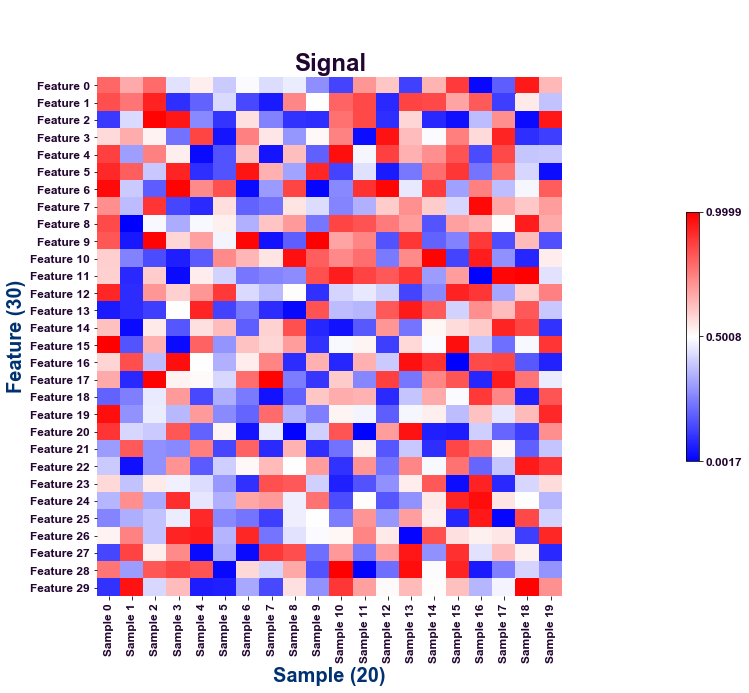

In [4]:
ccal.plot_heatmap(
    signal__feature_x_sample,
    title='Signal',
    decorate_ax_kwargs={
        'xlabel': 'Sample',
        'ylabel': 'Feature',
    })

Dropping 0 axis-0 slices ...
* ======= Dropped slices ======= *
[]
* ============================== *
Dropping 0 axis-1 slices ...
* ======= Dropped slices ======= *
[]
* ============================== *
Signal sum: 300.473
A sum: 299.542


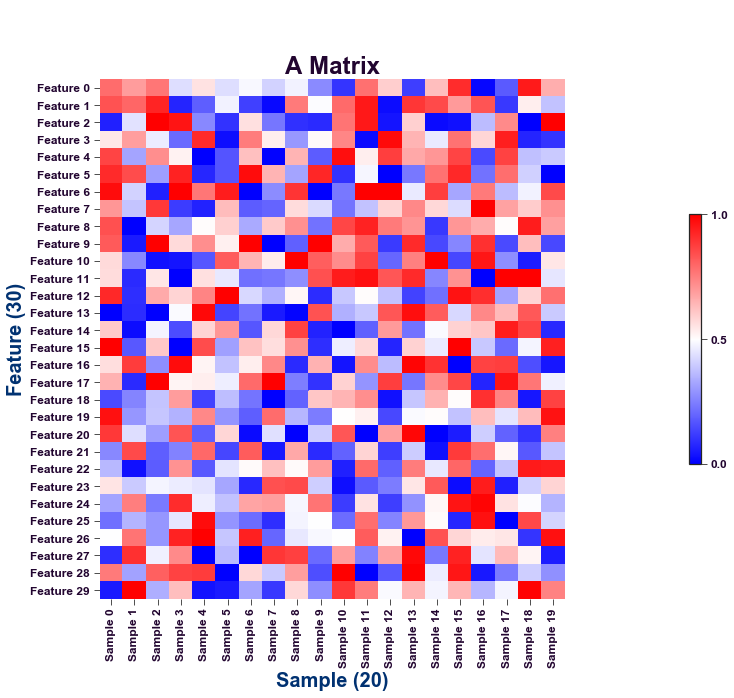

In [5]:
if a_matrix_normalization_method is None:
    a = signal__feature_x_sample.copy()

else:
    a = signal__feature_x_sample.values

    a = ccal.normalize_2d_array(a, a_matrix_normalization_method,
                                a_matrix_normalization_axis)

    a = pd.DataFrame(
        a,
        index=signal__feature_x_sample.index,
        columns=signal__feature_x_sample.columns)

a = ccal.drop_df_slices(a, 0, max_n_unique_object=1, print_dropped_slices=True)
a = ccal.drop_df_slices(a, 1, max_n_unique_object=1, print_dropped_slices=True)

print('Signal sum: {:.3f}'.format(signal__feature_x_sample.values.sum()))
print('A sum: {:.3f}'.format(a.values.sum()))

ccal.plot_heatmap(
    a,
    title='A Matrix',
    decorate_ax_kwargs={
        'xlabel': 'Sample',
        'ylabel': 'Feature',
    })

In [6]:
print('Axis 0 sum:')
print(a.sum().sort_values(ascending=False))

print('Axis 1 sum:')
print(a.sum(axis=1).sort_values(ascending=False))

Axis 0 sum:
Sample 13    17.961056
Sample 15    17.414736
Sample 0     17.366494
Sample 11    17.337697
Sample 16    17.237309
Sample 19    15.955941
Sample 3     15.740638
Sample 14    15.530166
Sample 18    15.404791
Sample 17    15.345355
Sample 4     14.835923
Sample 8     14.829538
Sample 10    14.630564
Sample 2     14.554710
Sample 6     13.244060
Sample 12    12.902799
Sample 1     12.718978
Sample 9     12.462317
Sample 7     12.098800
Sample 5     11.970308
dtype: float64
Axis 1 sum:
Feature 6     11.694798
Feature 8     11.440591
Feature 26    11.385840
Feature 17    11.228859
Feature 11    10.876419
Feature 1     10.780033
Feature 24    10.655313
Feature 9     10.620742
Feature 16    10.572787
Feature 12    10.556995
Feature 4     10.466192
Feature 10    10.419701
Feature 3     10.255963
Feature 0     10.255682
Feature 15    10.121723
Feature 7     10.100729
Feature 5     10.046253
Feature 28    10.028911
Feature 27     9.976555
Feature 29     9.884813
Feature 19     9.8153

NMFCC with K=2 ...
	(K=2) 10/10 - done.
NMFCC with K=3 ...
	(K=3) 10/10 - done.


/Users/k/Jumis/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


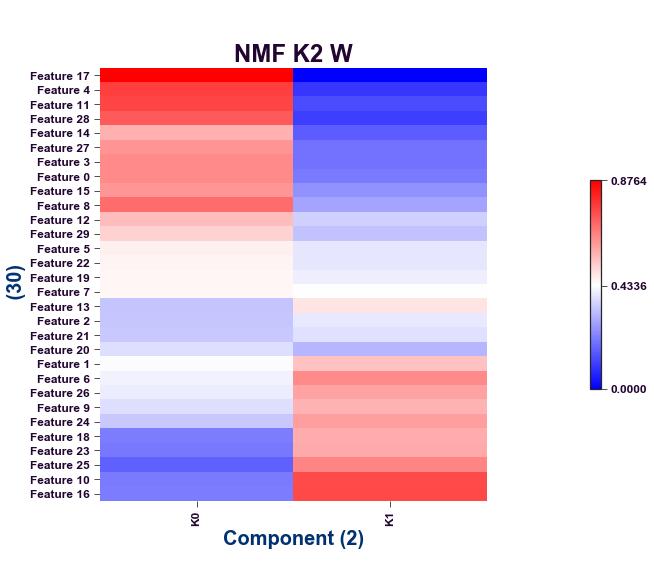

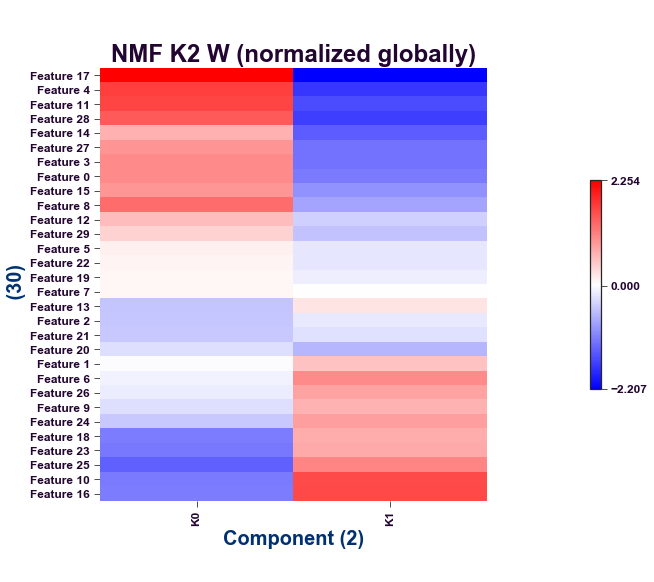

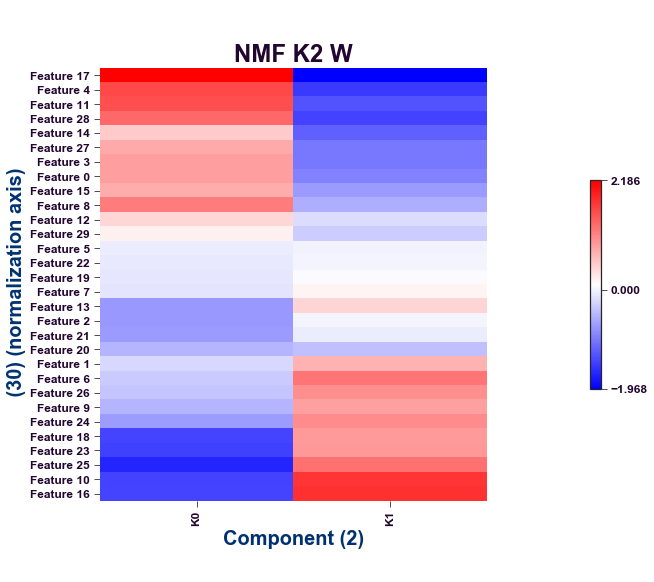

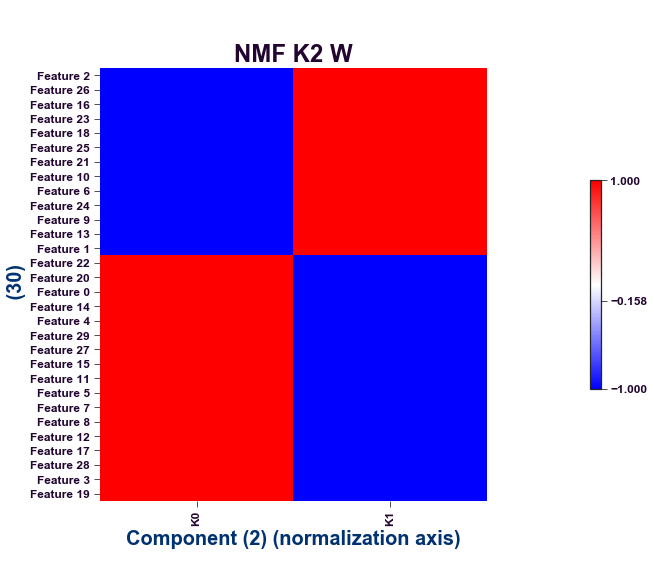

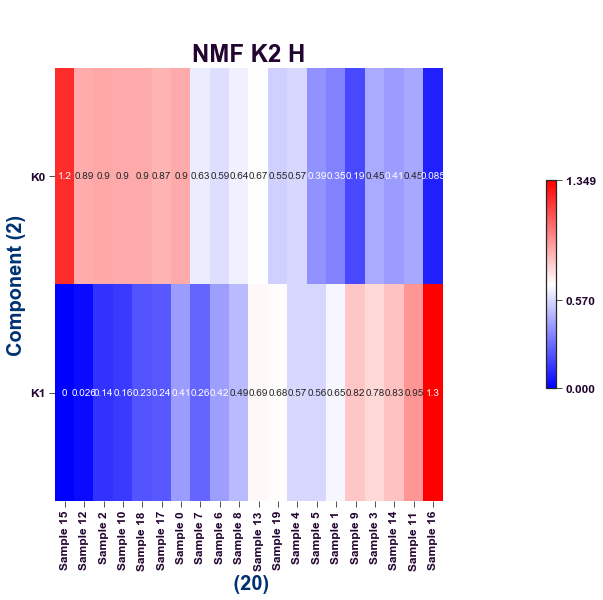

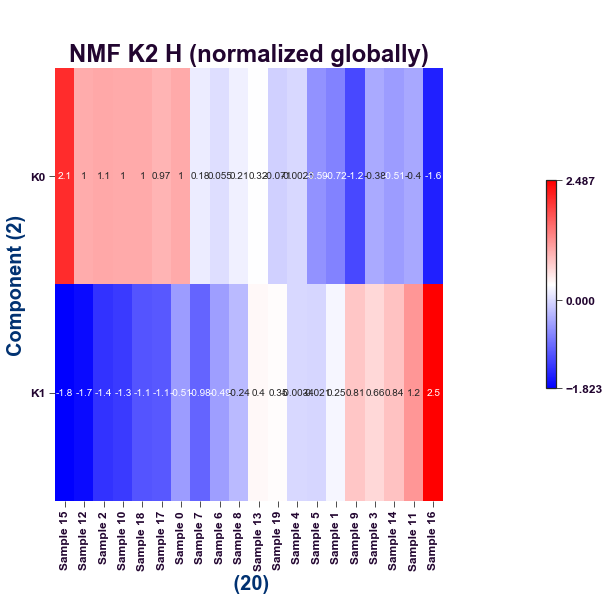

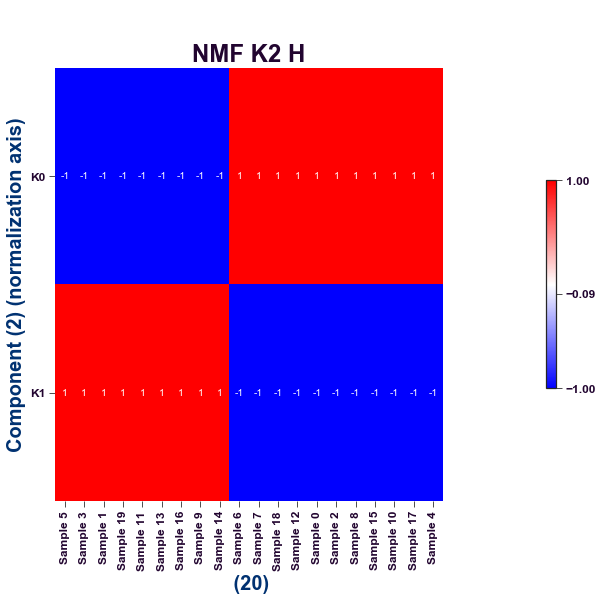

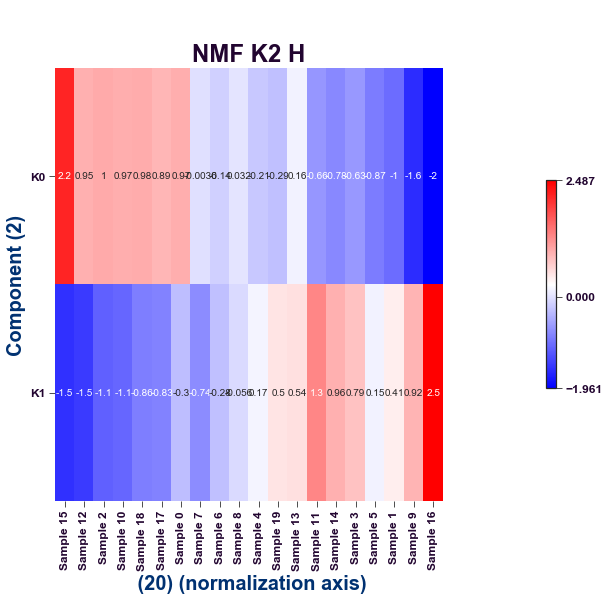

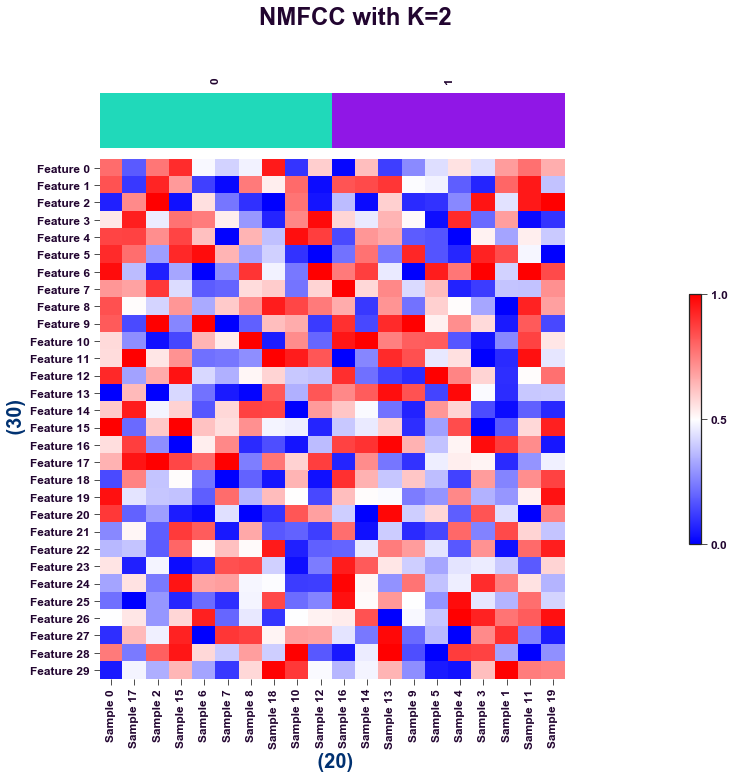

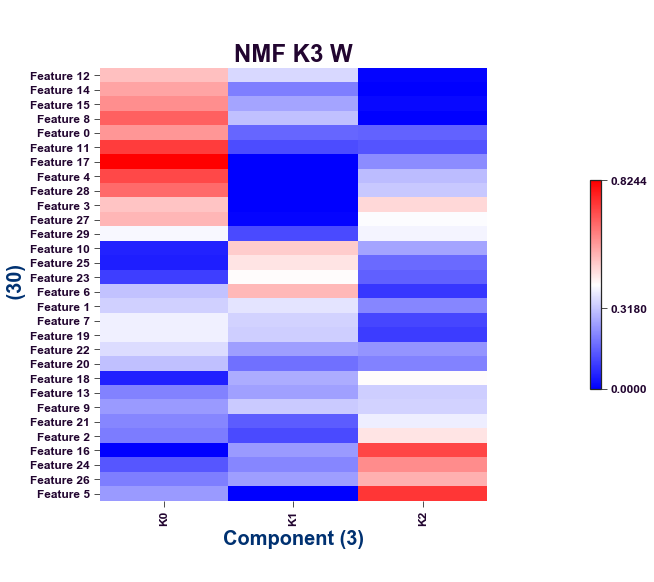

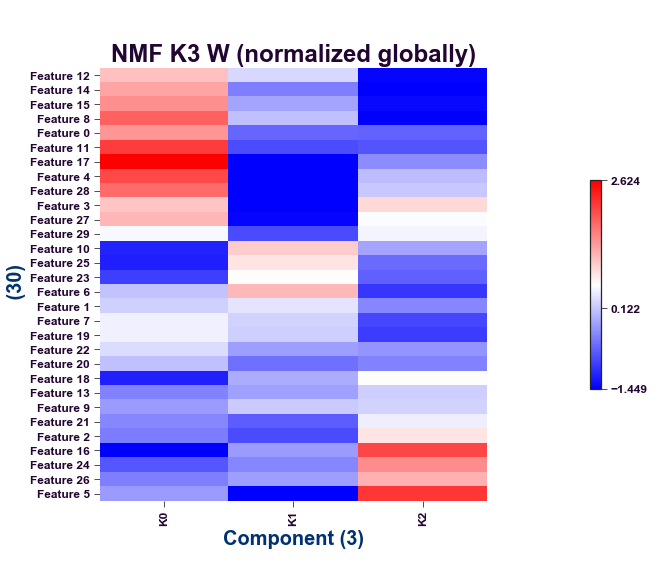

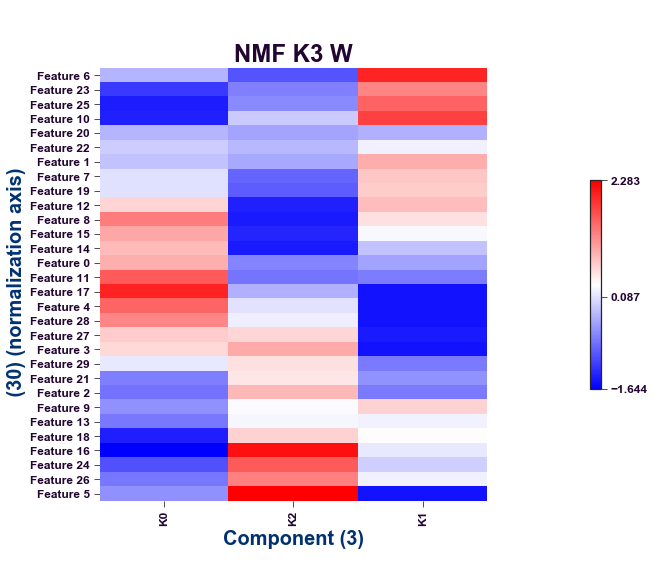

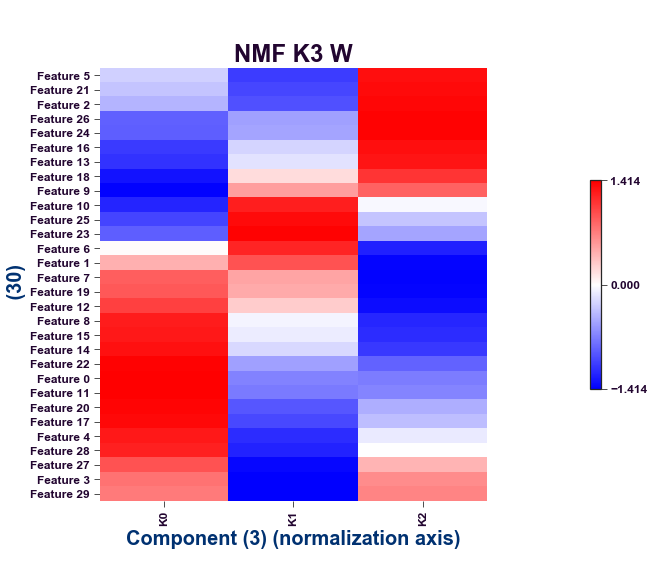

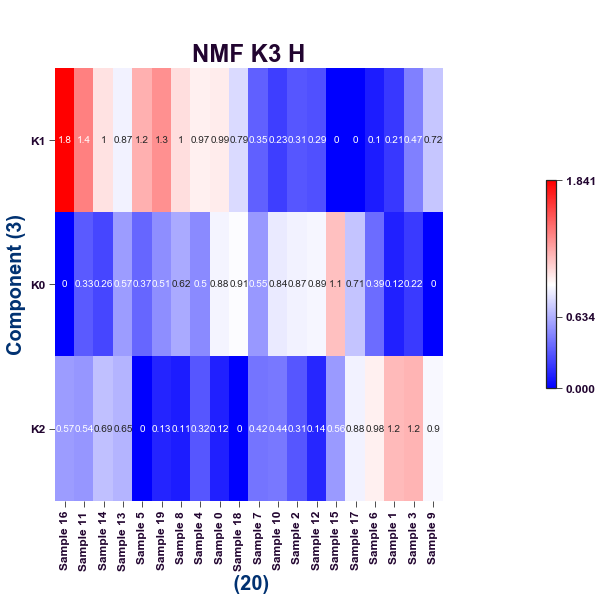

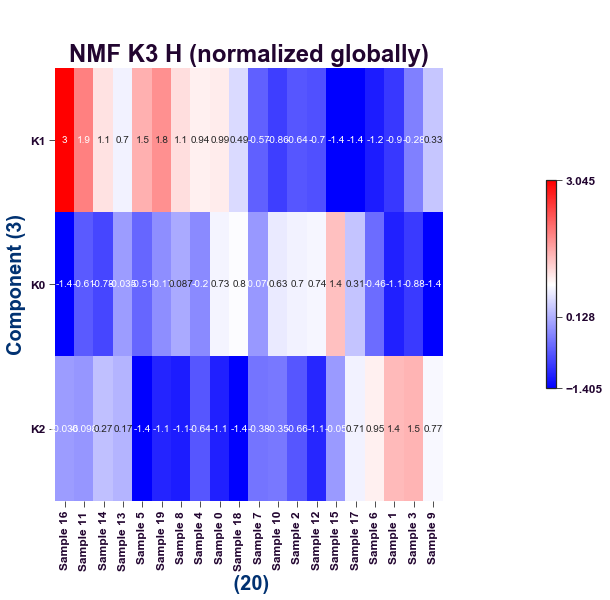

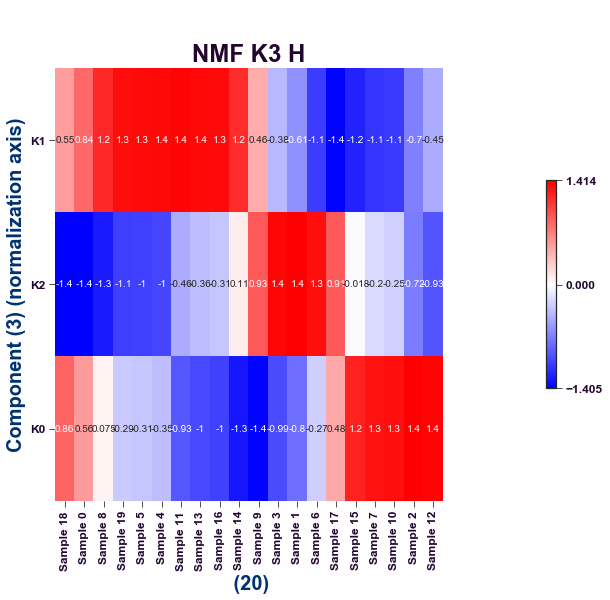

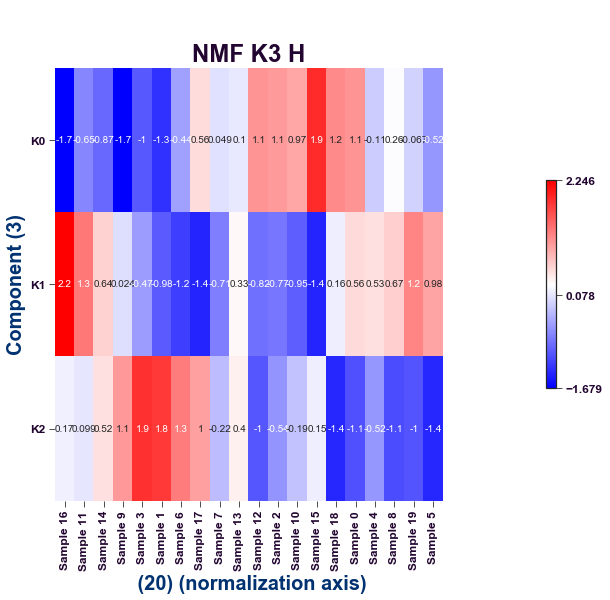

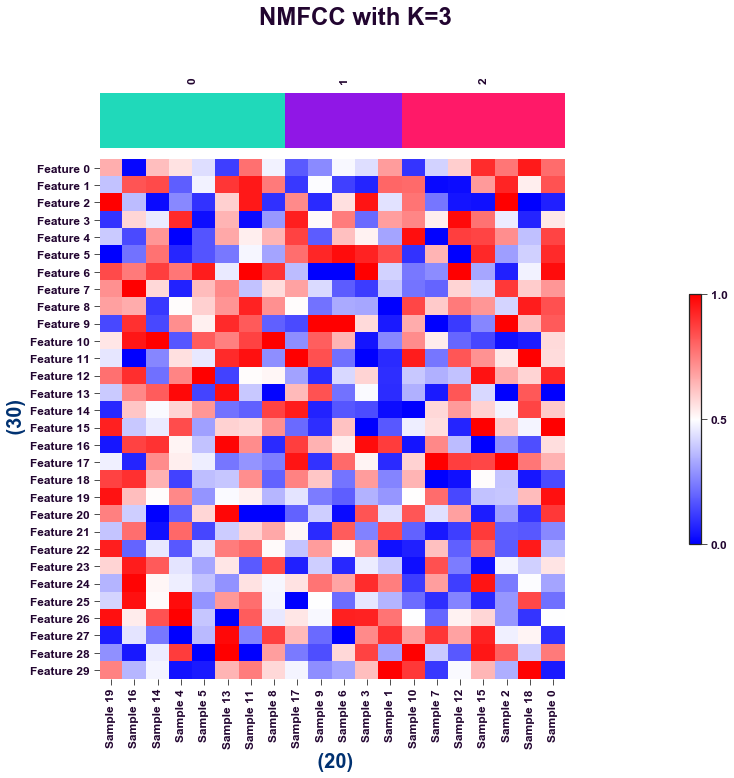

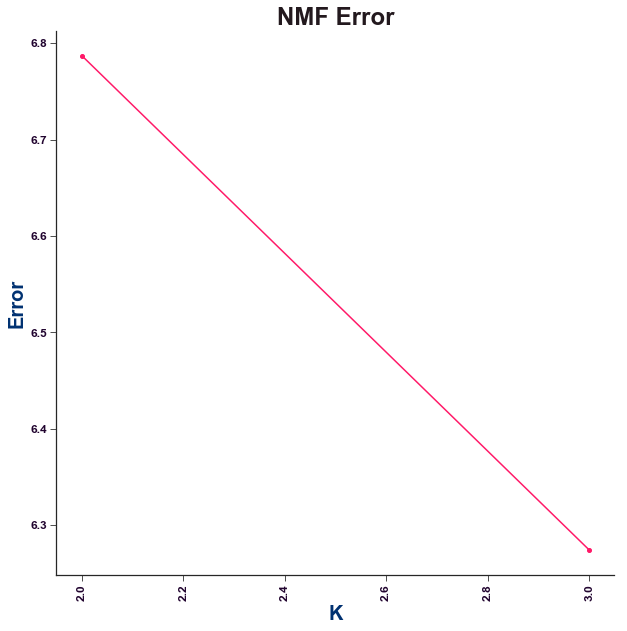

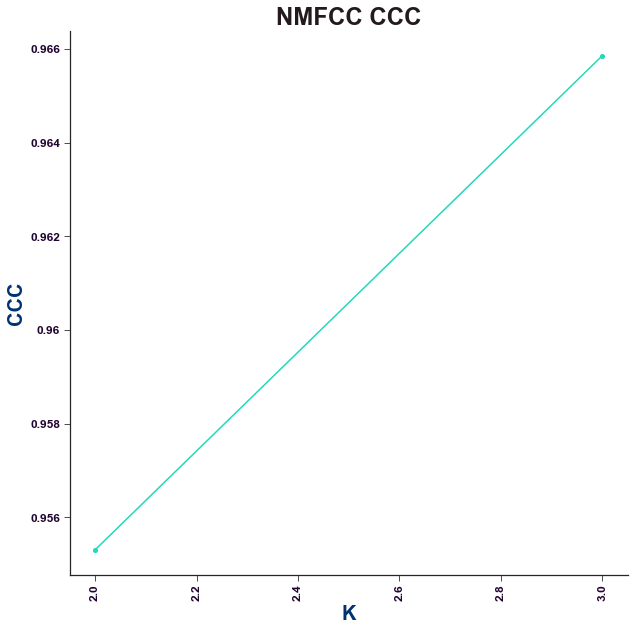

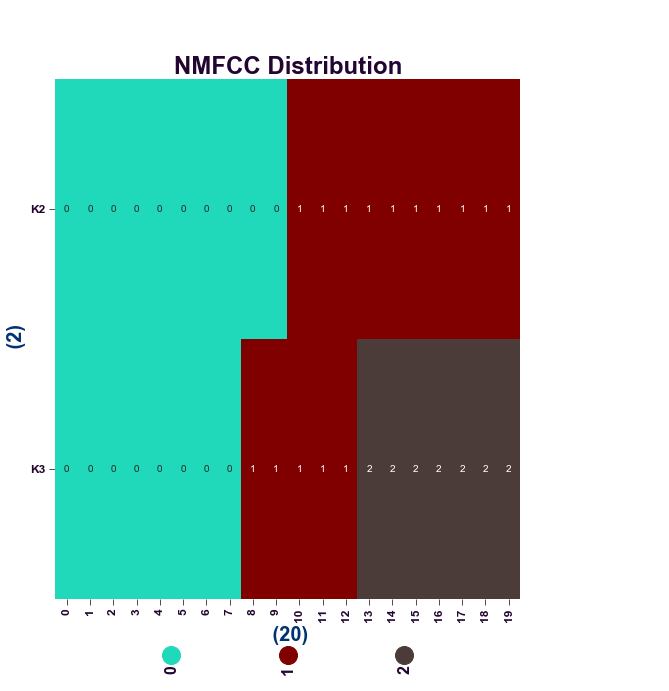

In [7]:
k_nmf, k_nmfcc_distance_linkage_ccc, nmfcc__k_x_column = ccal.nmf_consensus_cluster_with_multiple_k(
    a,
    nmf_ks,
    n_job=min(max(nmf_ks) - min(nmf_ks) + 1, max_n_job),
    n_clustering=nmf_n_clustering,
    plot_w=True,
    plot_h=True,
    plot_df=True,
    directory_path=output_directory_path)

In [8]:
nmf_k = 3

w = k_nmf['K{}'.format(nmf_k)]['w']
w.index.name = 'Feature'
w.columns.name = 'Component'

h = k_nmf['K{}'.format(nmf_k)]['h']
h.index.name = 'Component'
h.columns.name = 'Sample'

Applying <function compute_information_coefficient at 0x11d605268> ...
	1/3 ...
	3/3 - done.
Applying <function compute_information_coefficient at 0x11d605268> ...
	1/3 ...
	3/3 - done.


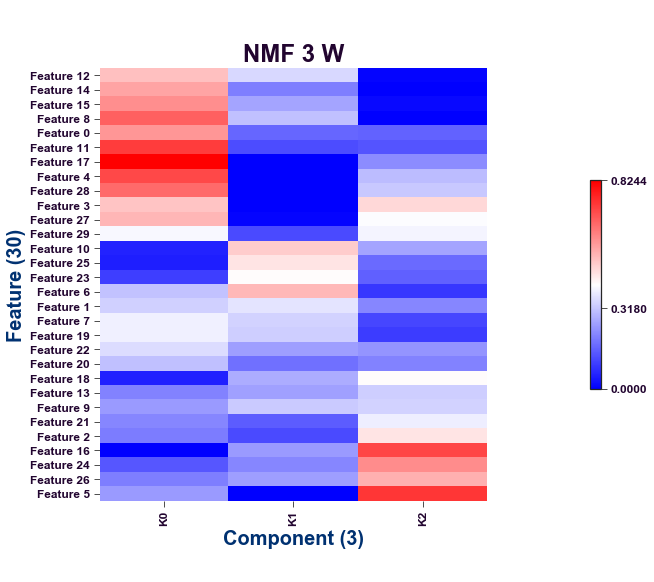

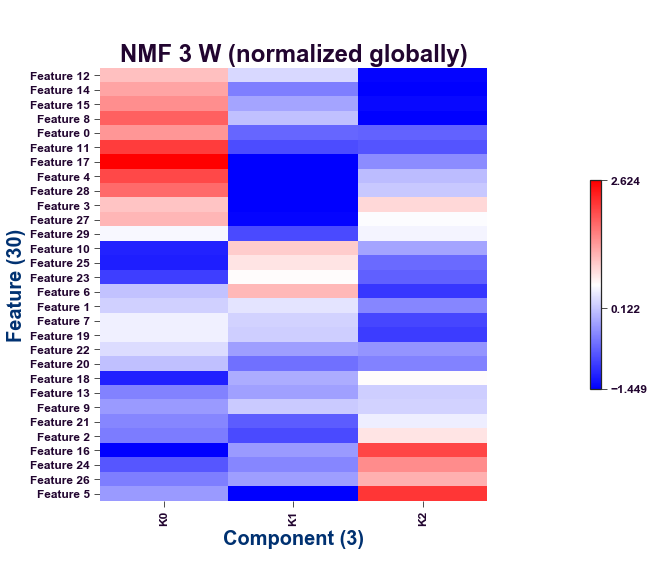

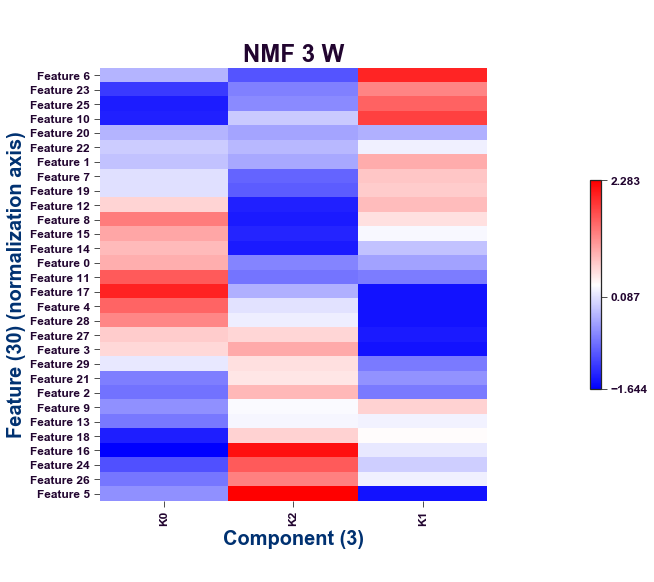

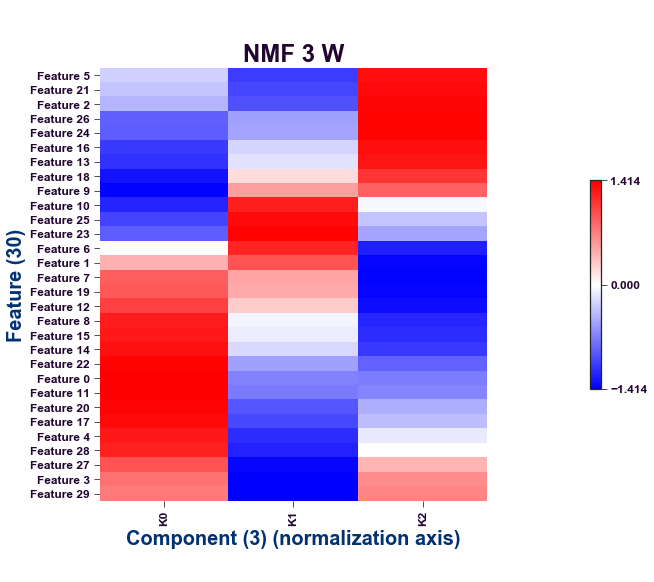

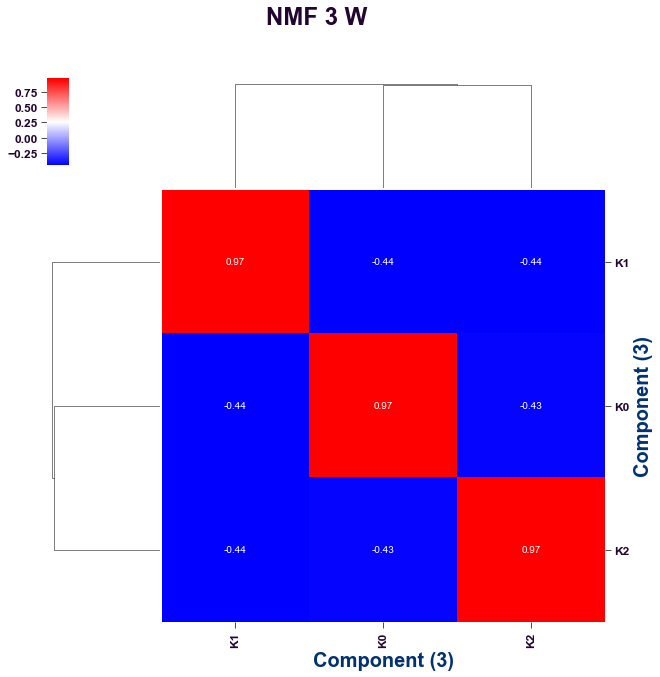

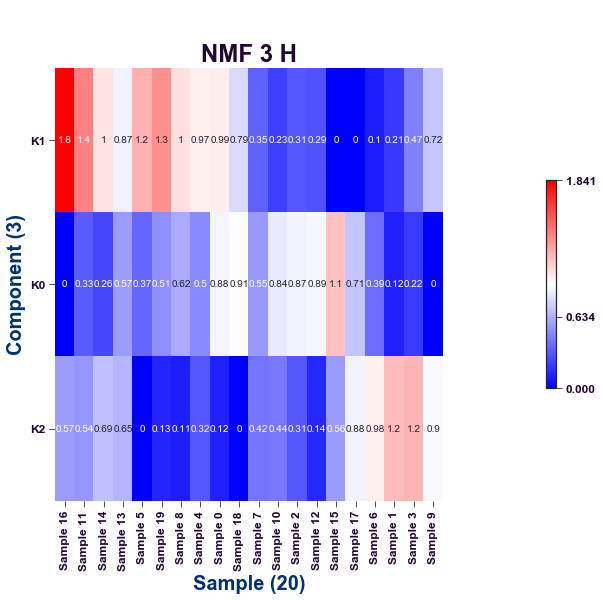

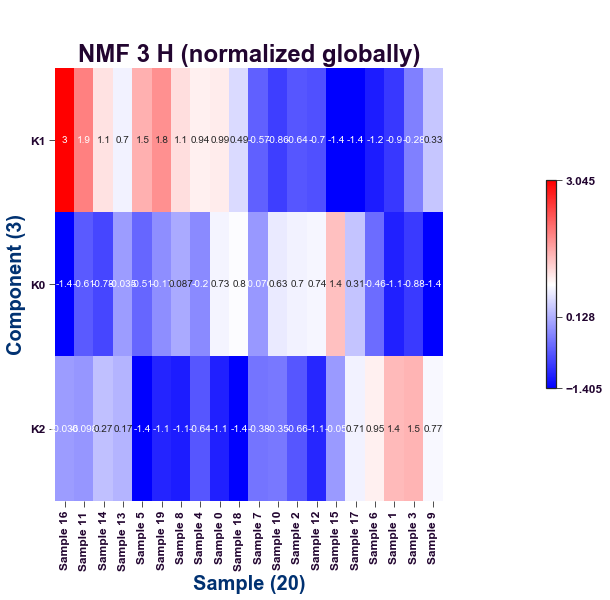

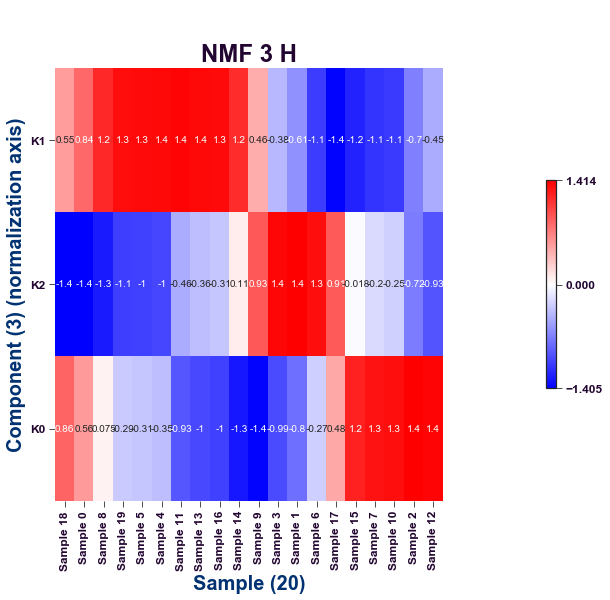

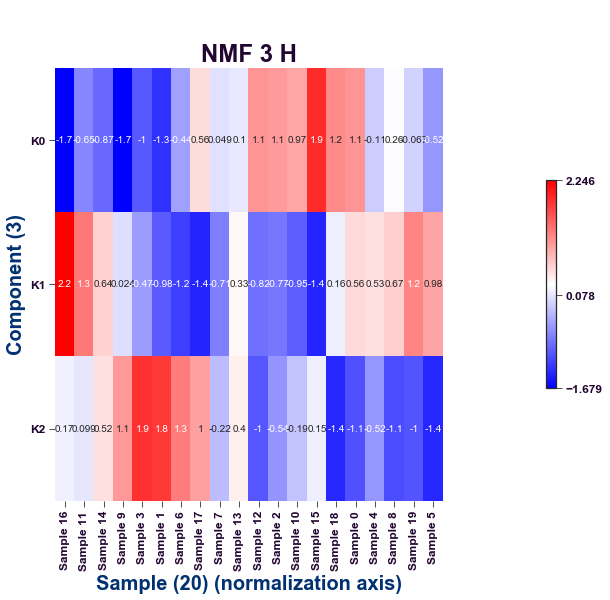

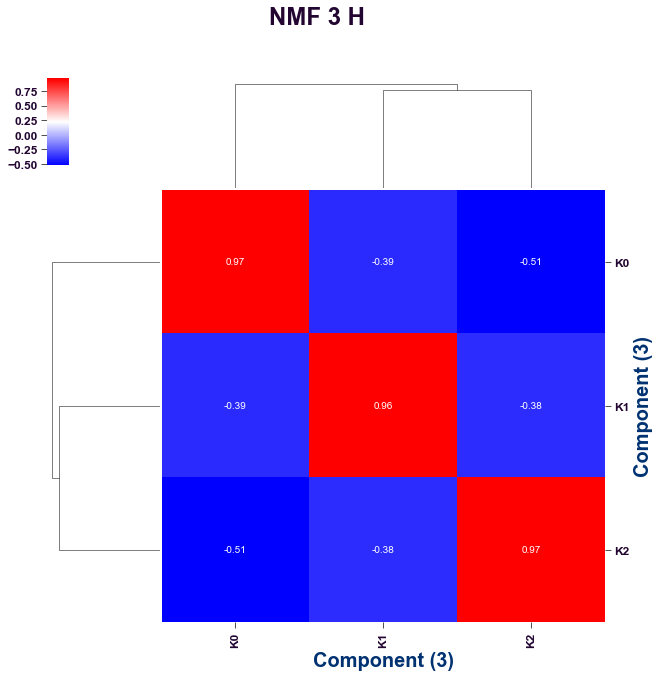

In [9]:
for matrix, w_or_h in (
    (
        w,
        'w', ),
    (
        h,
        'h', ), ):

    title = 'NMF {} {}'.format(nmf_k, w_or_h.title())

    ccal.normalize_and_plot_heatmap(
        matrix,
        title=title,
        decorate_ax_kwargs={
            'xlabel': matrix.columns.name,
            'ylabel': matrix.index.name,
        })

    ccal.make_comparison_panel(
        matrix,
        matrix,
        axis=(
            0,
            1, )[w_or_h == 'h'],
        title=title,
        array_2d_0_name='Component',
        array_2d_1_name='Component',
        file_path_prefix=os.path.join(output_directory_path, w_or_h,
                                      'component'))

W K0 vs a
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


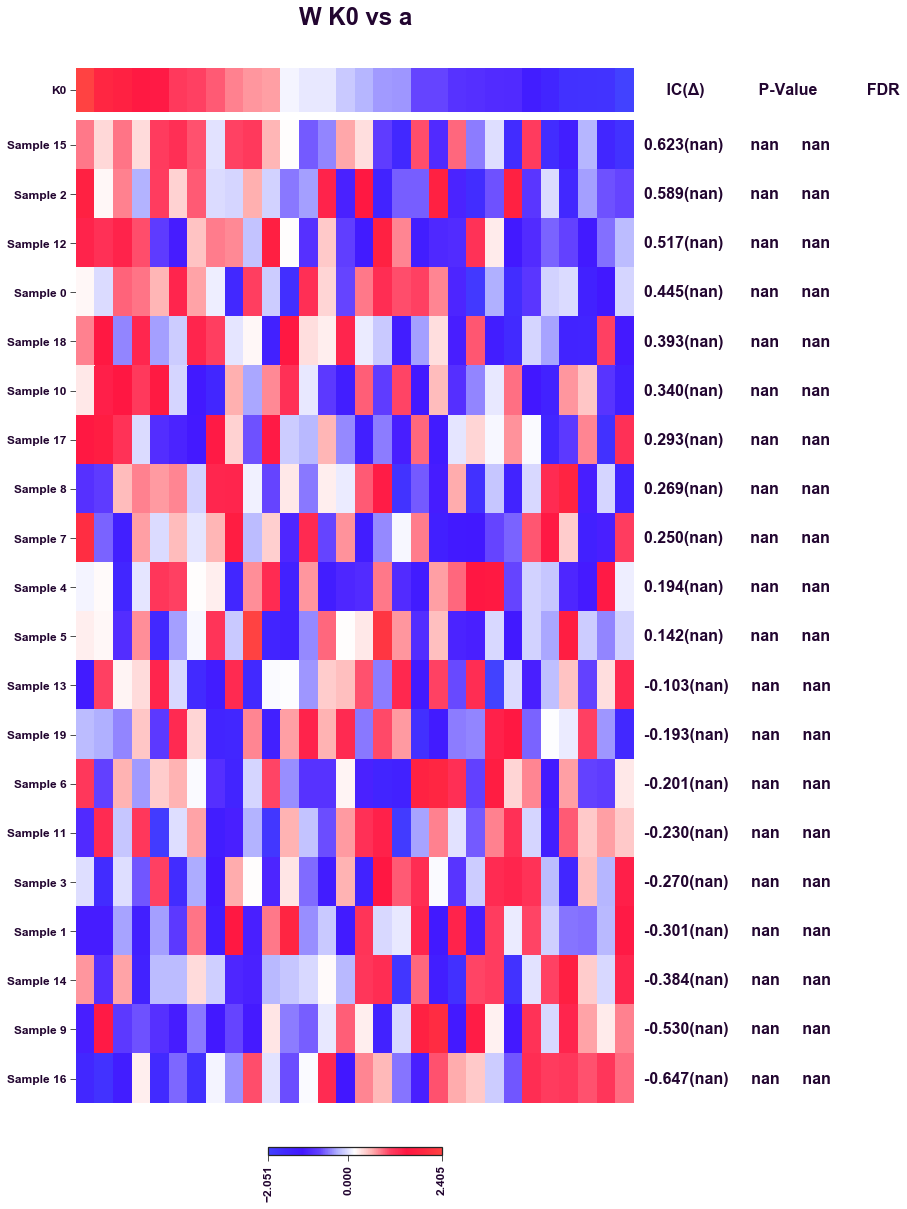

W K0 vs signal__feature_x_sample
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


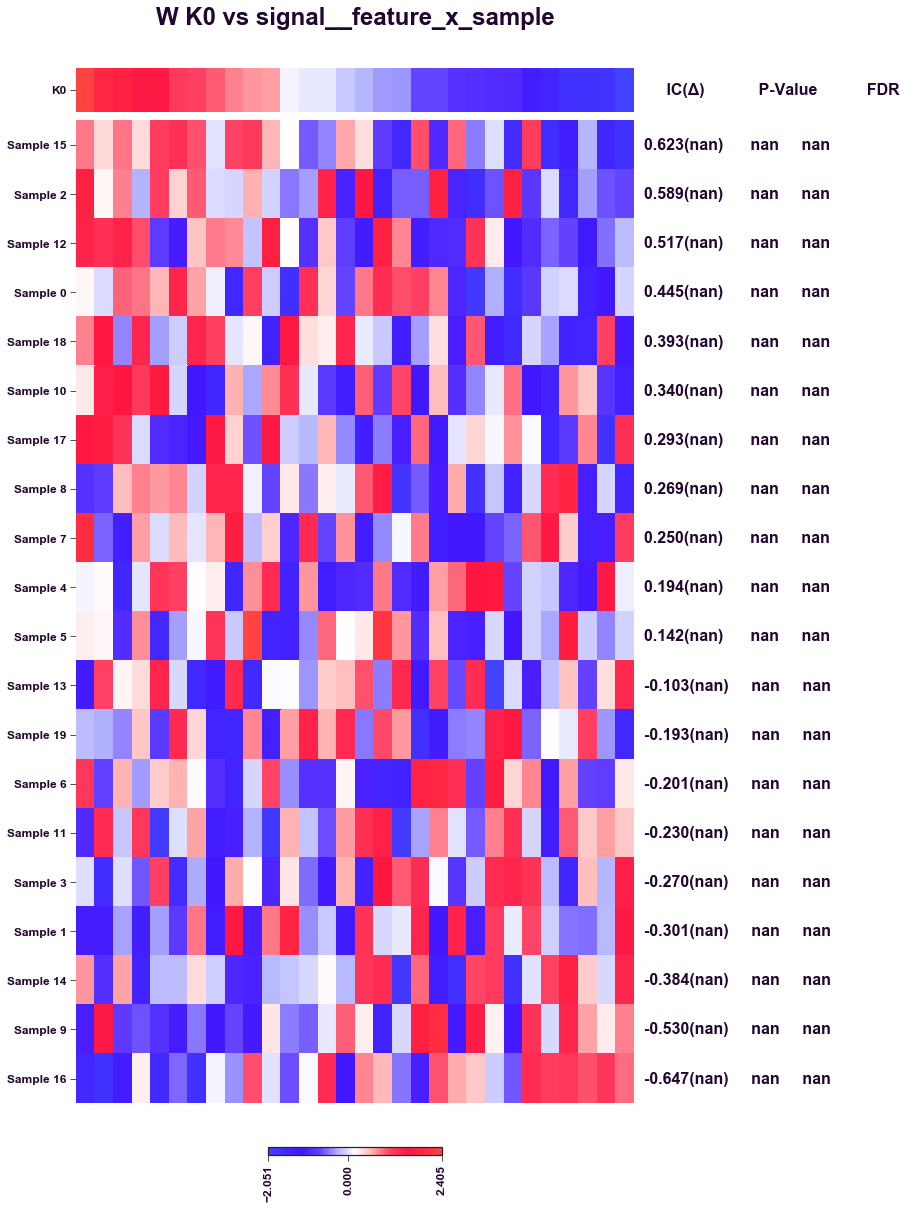

H K0 vs a
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


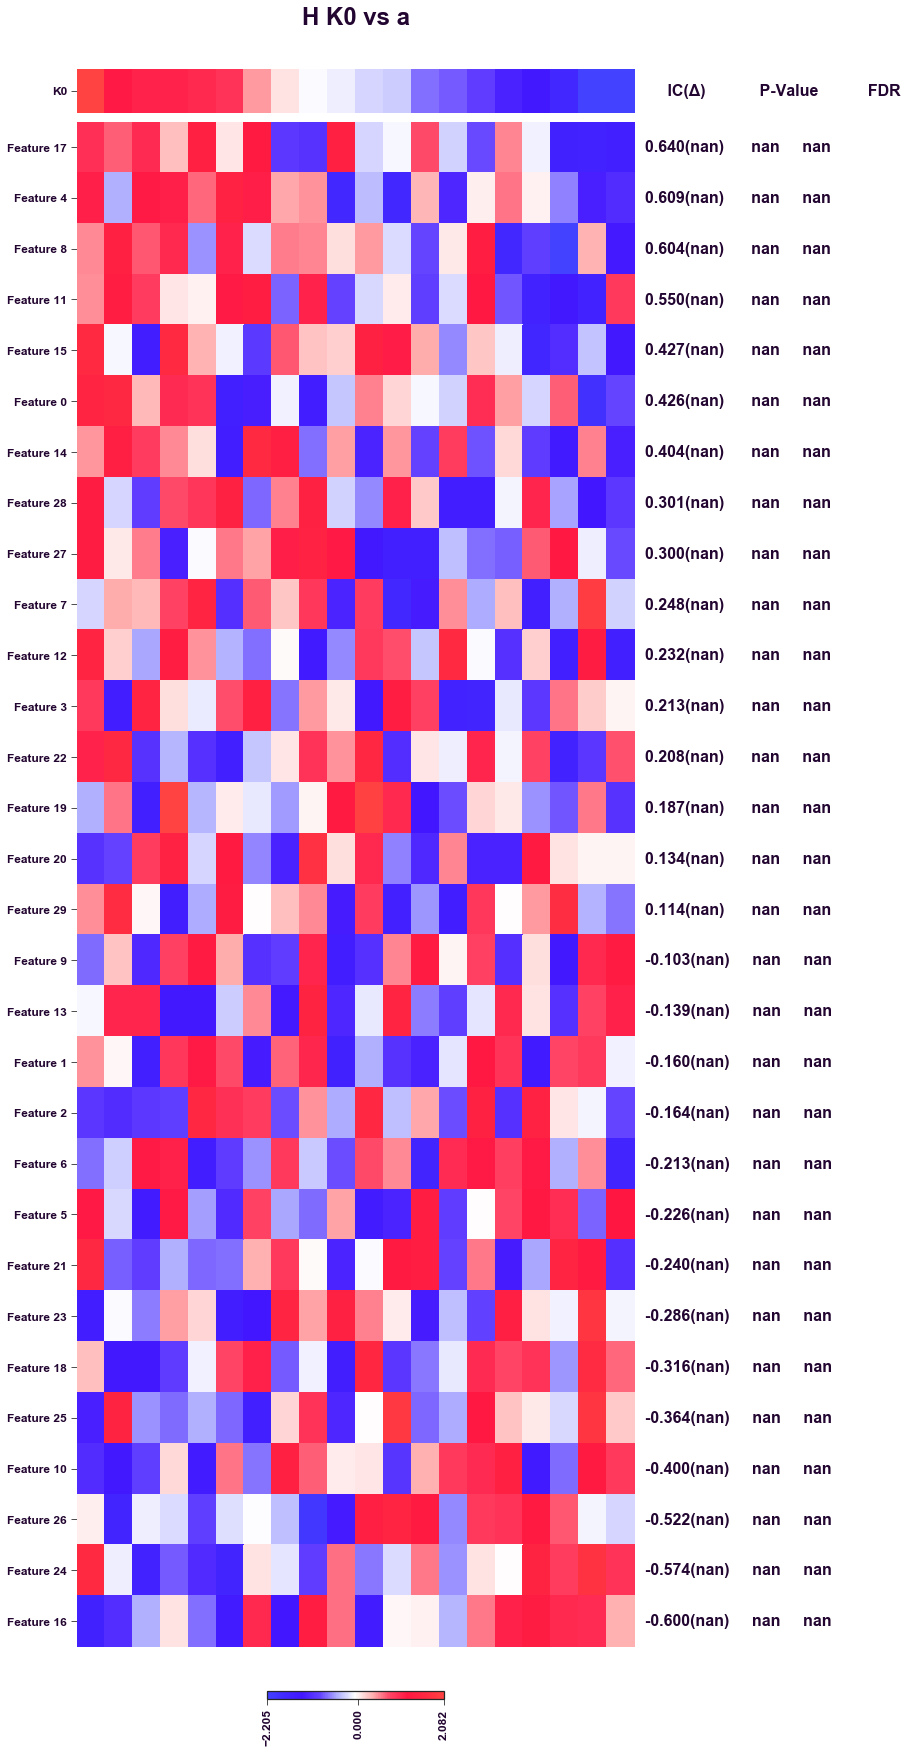

H K0 vs signal__feature_x_sample
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


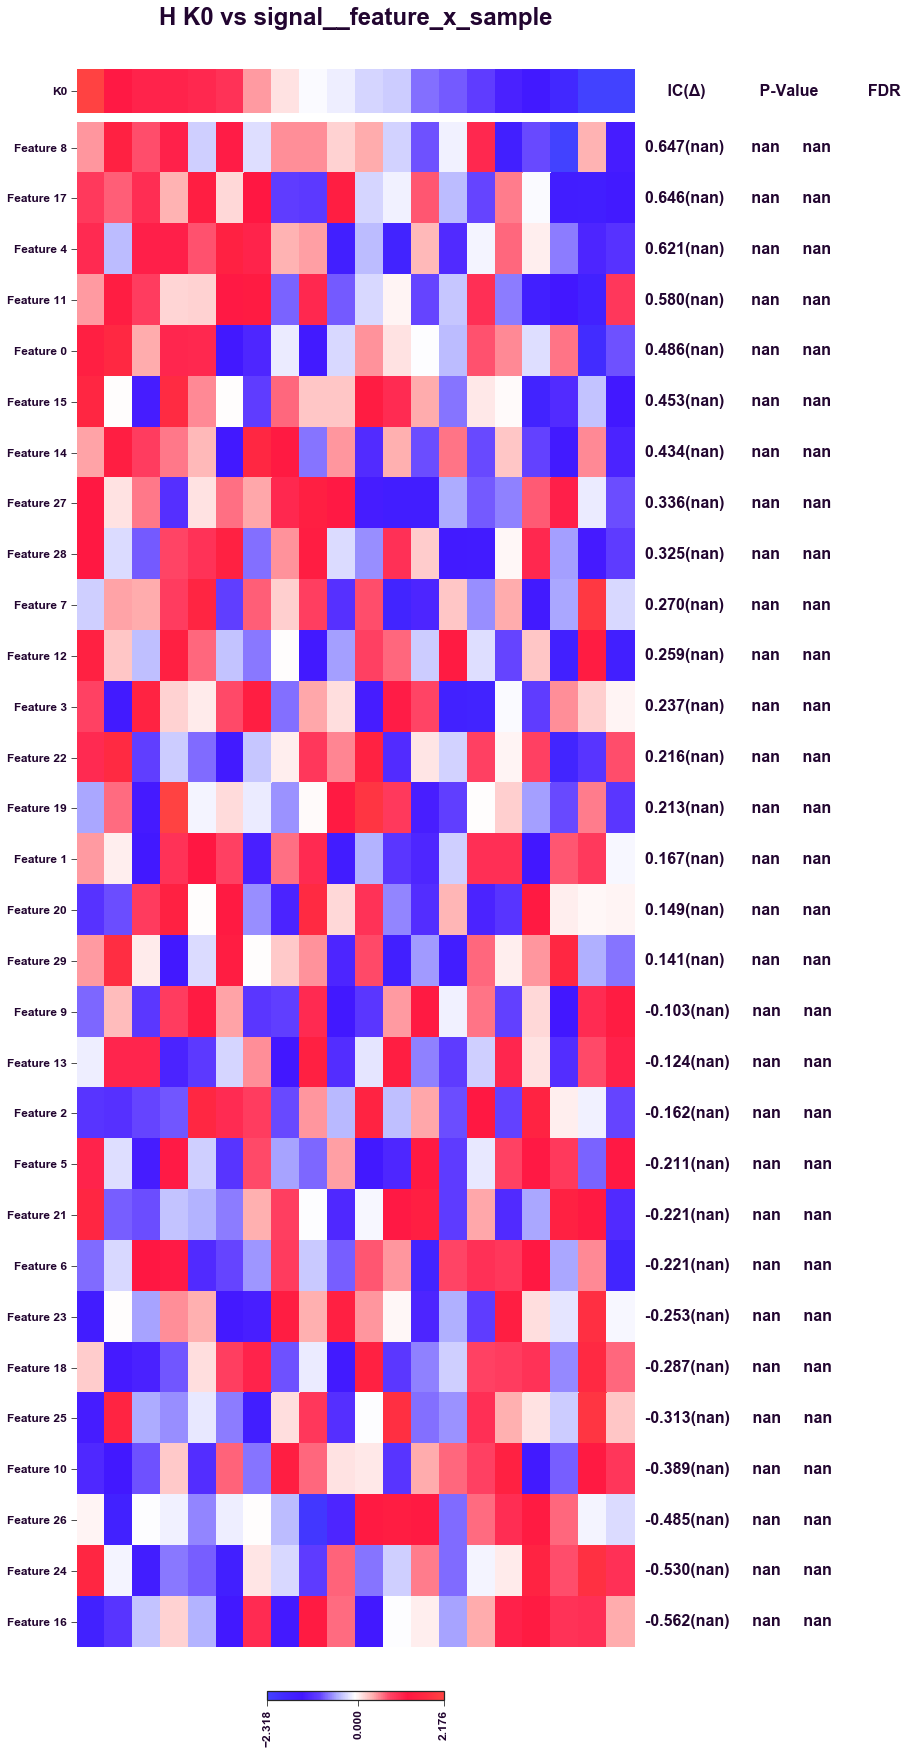

W K1 vs a
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


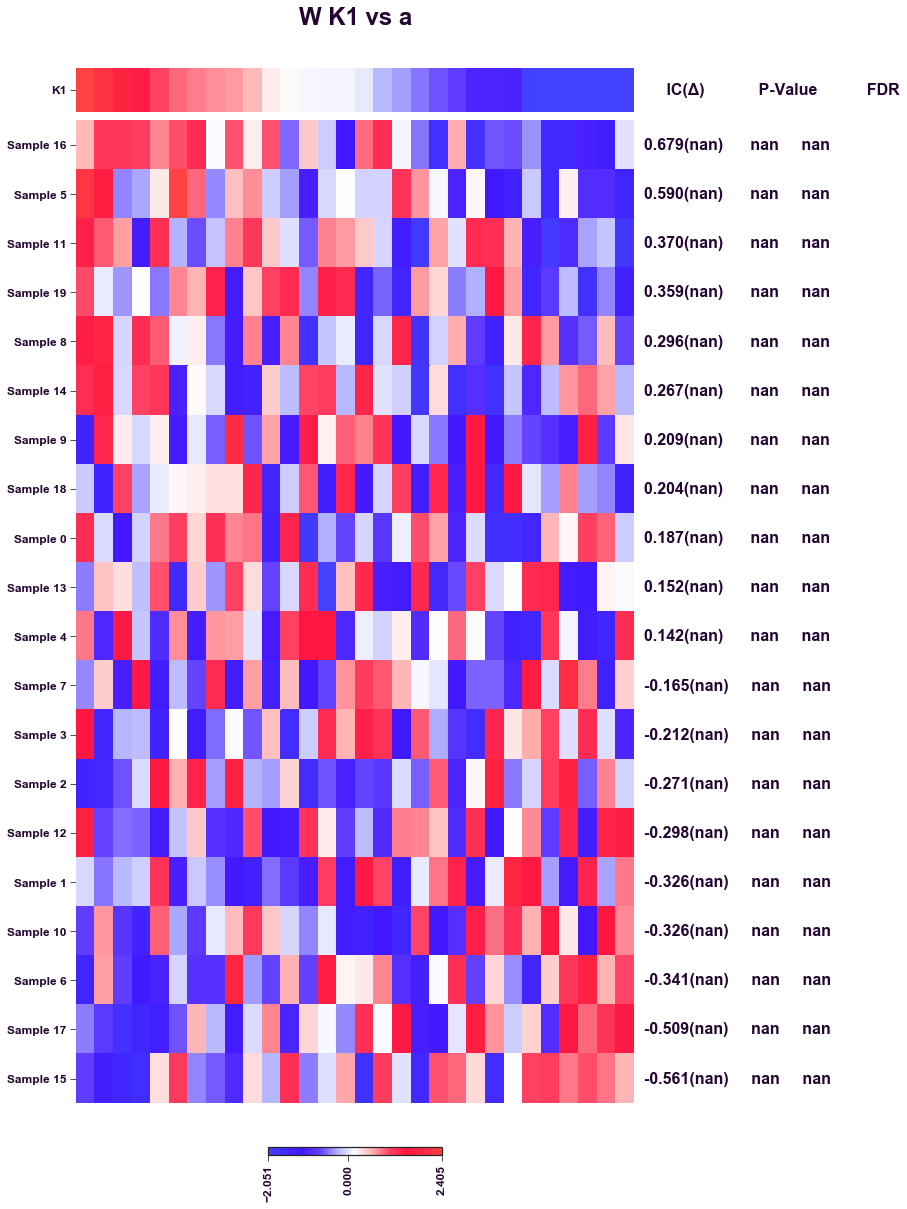

W K1 vs signal__feature_x_sample
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


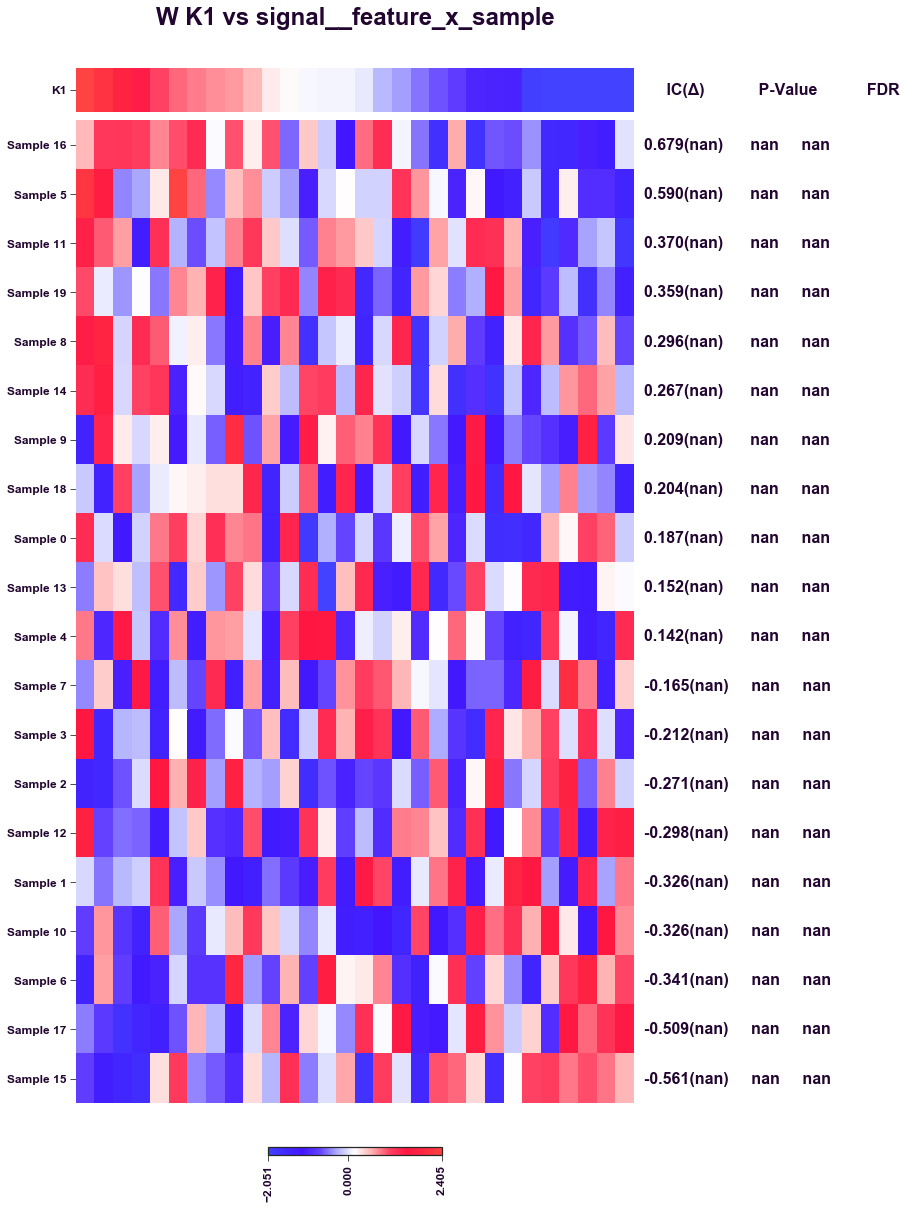

H K1 vs a
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


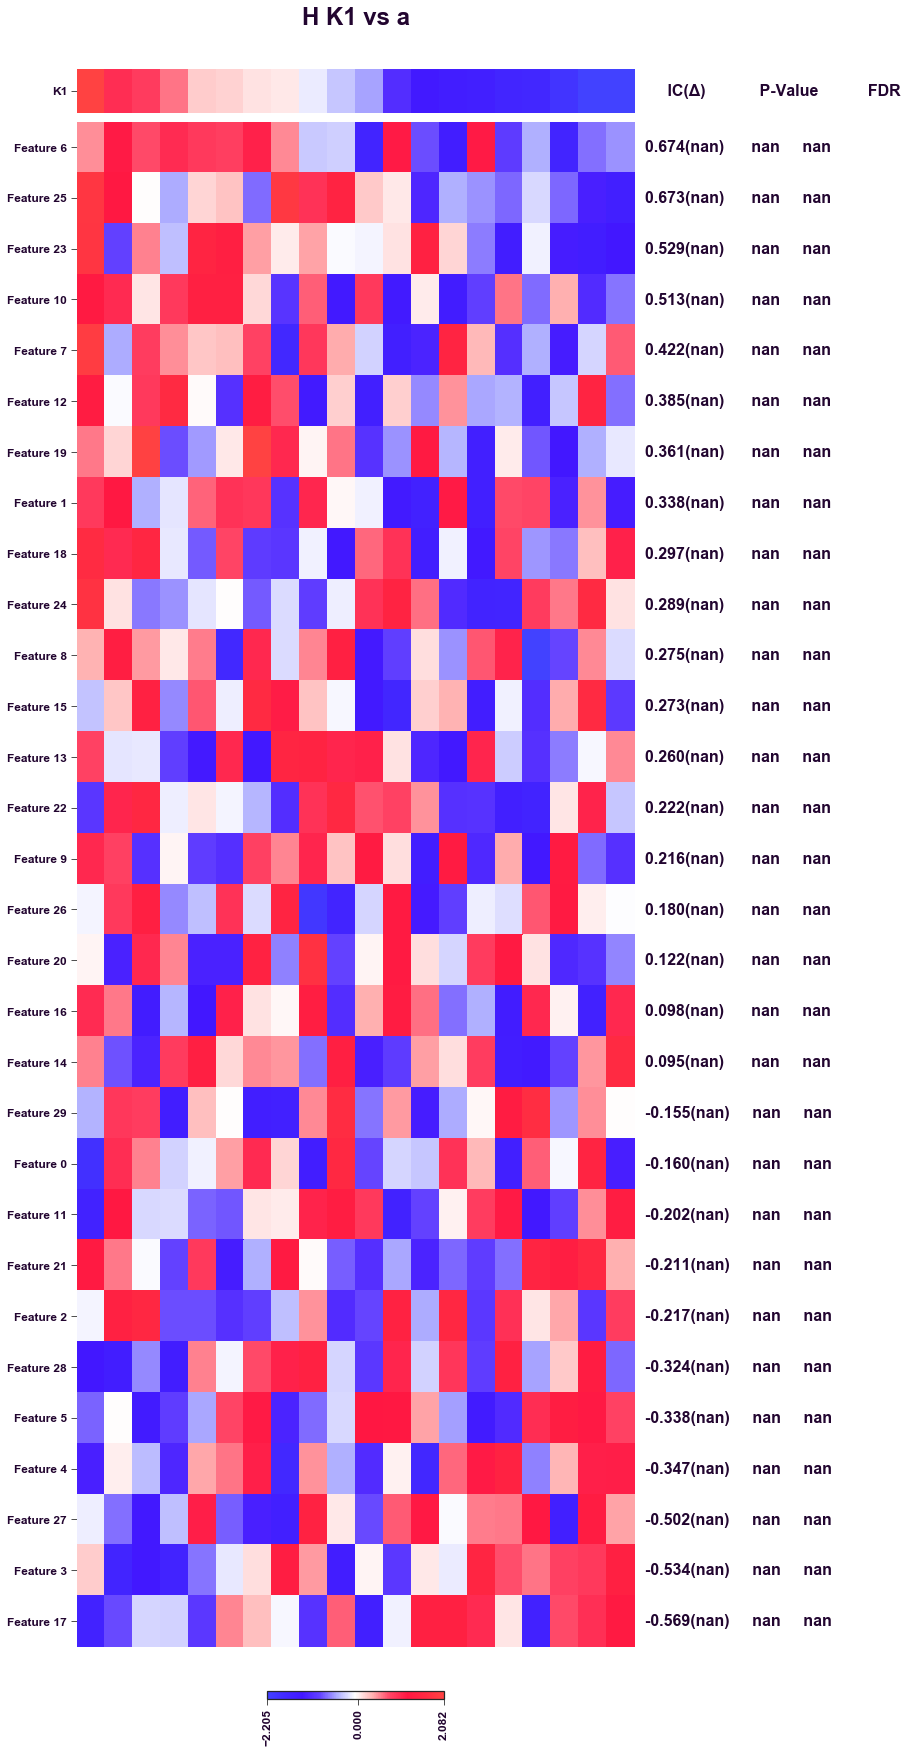

H K1 vs signal__feature_x_sample
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


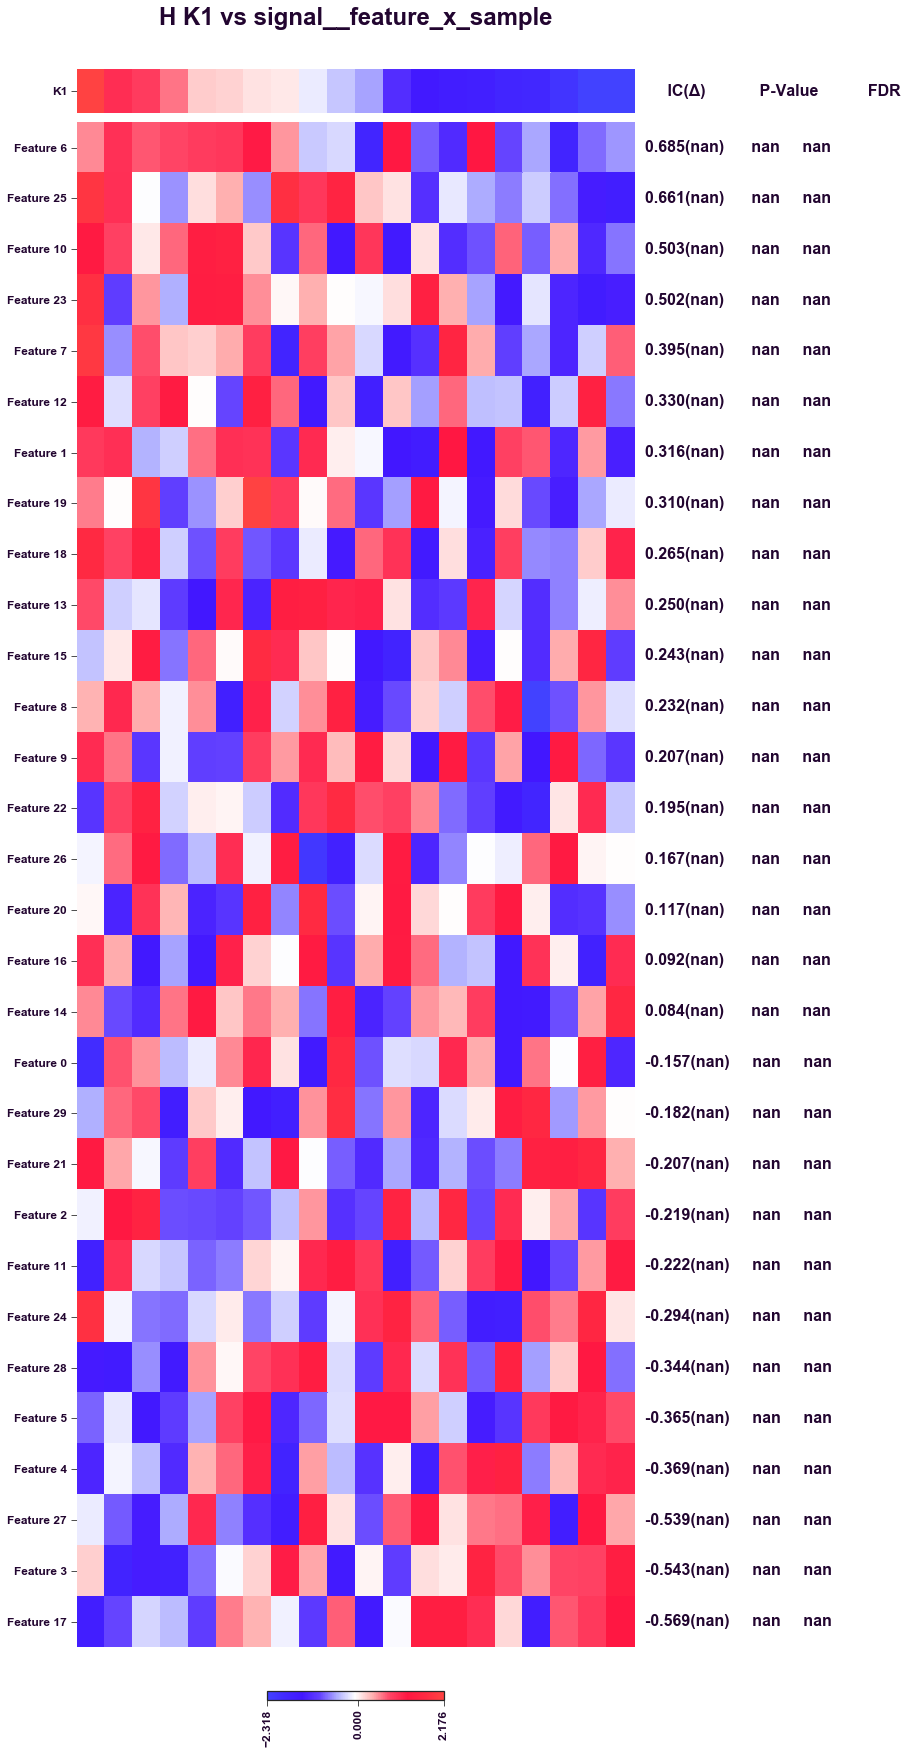

W K2 vs a
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


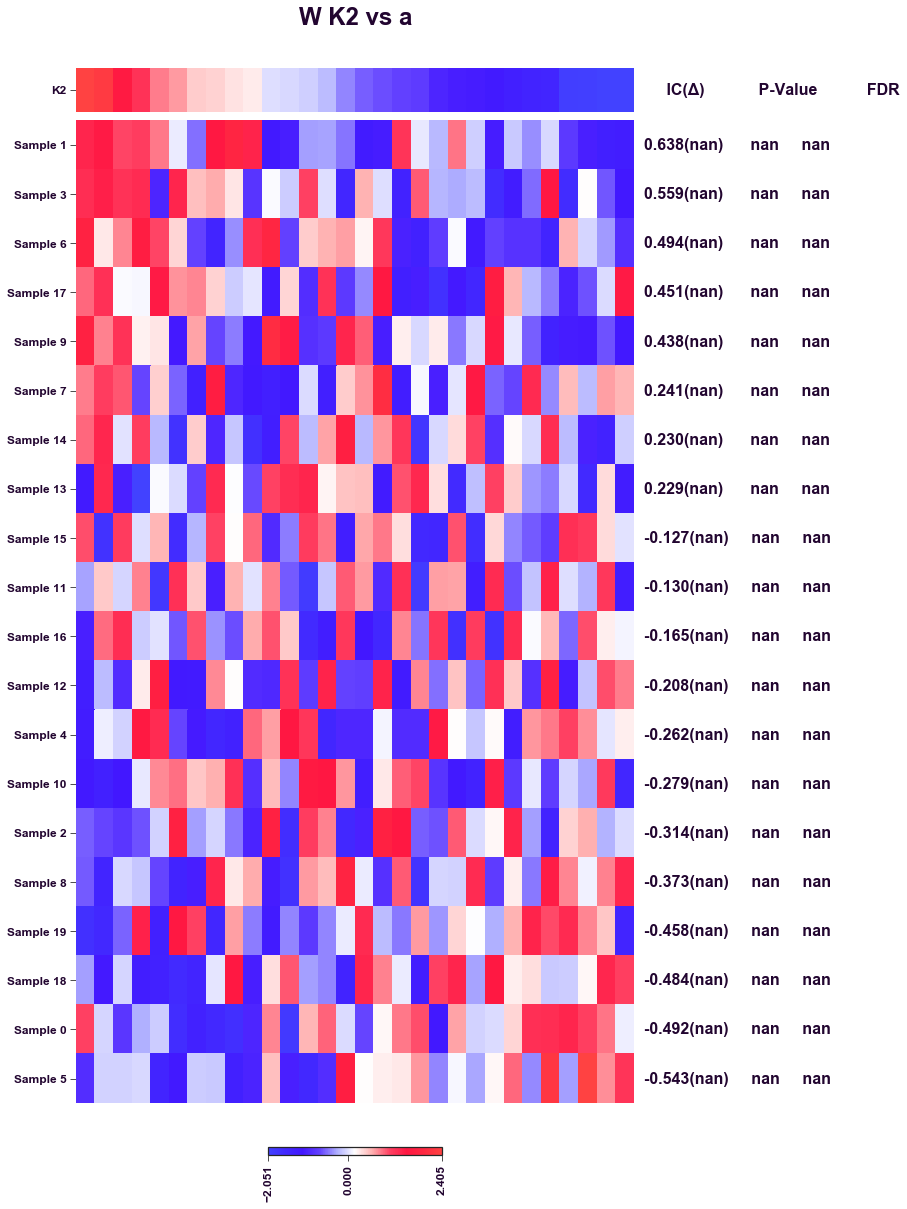

W K2 vs signal__feature_x_sample
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


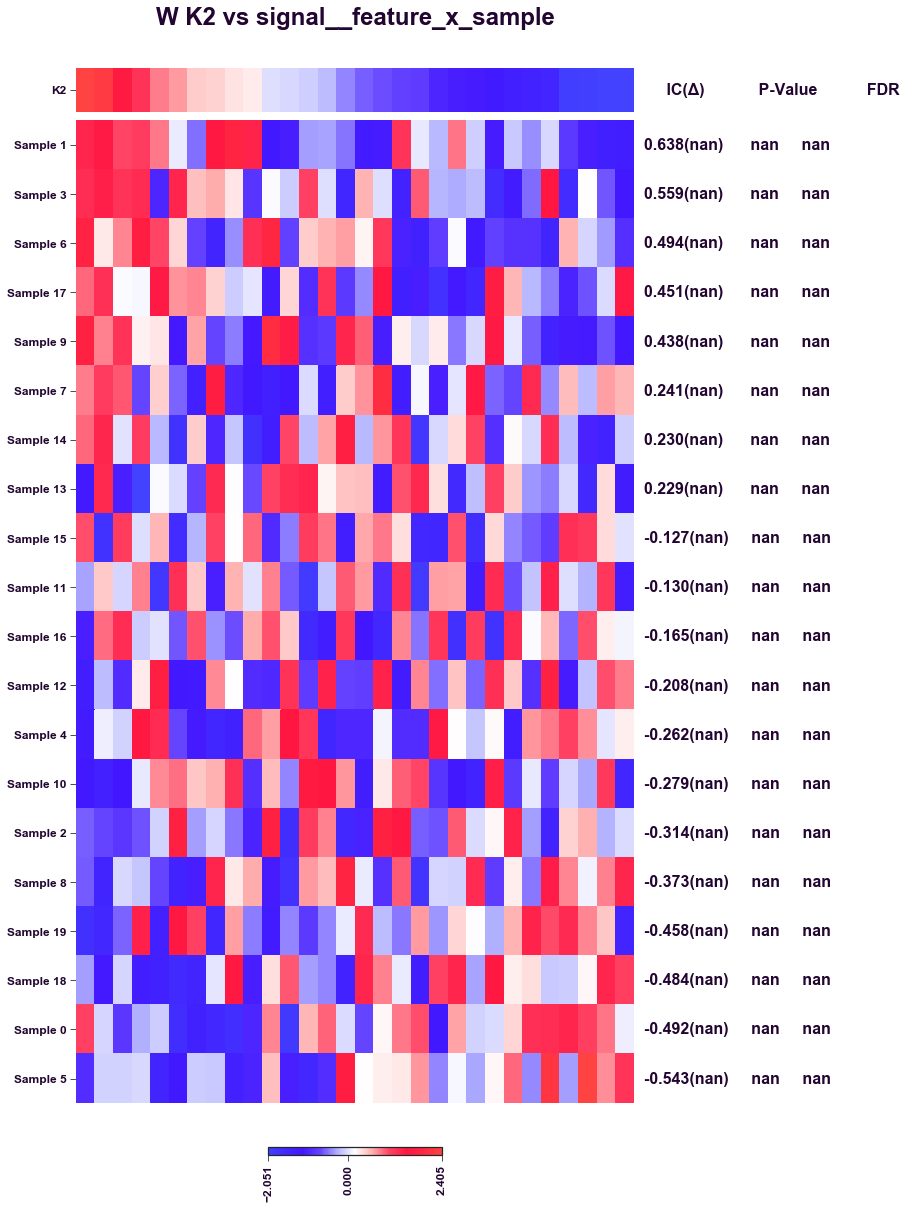

H K2 vs a
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


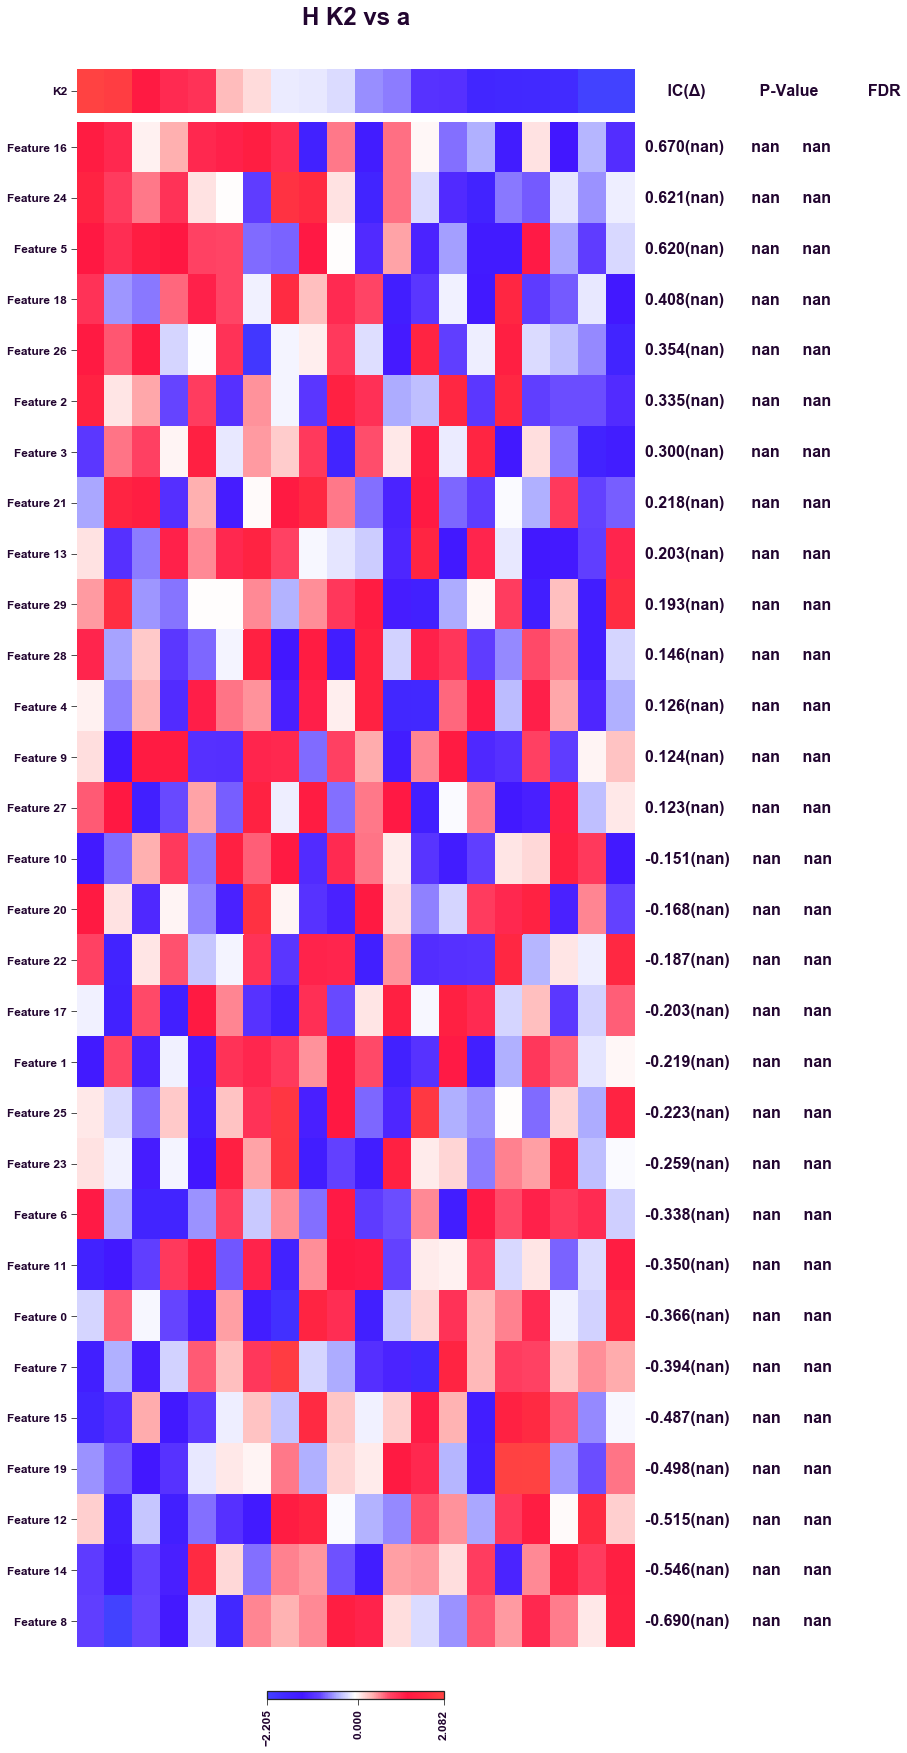

H K2 vs signal__feature_x_sample
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11d605268> (1 process) ...


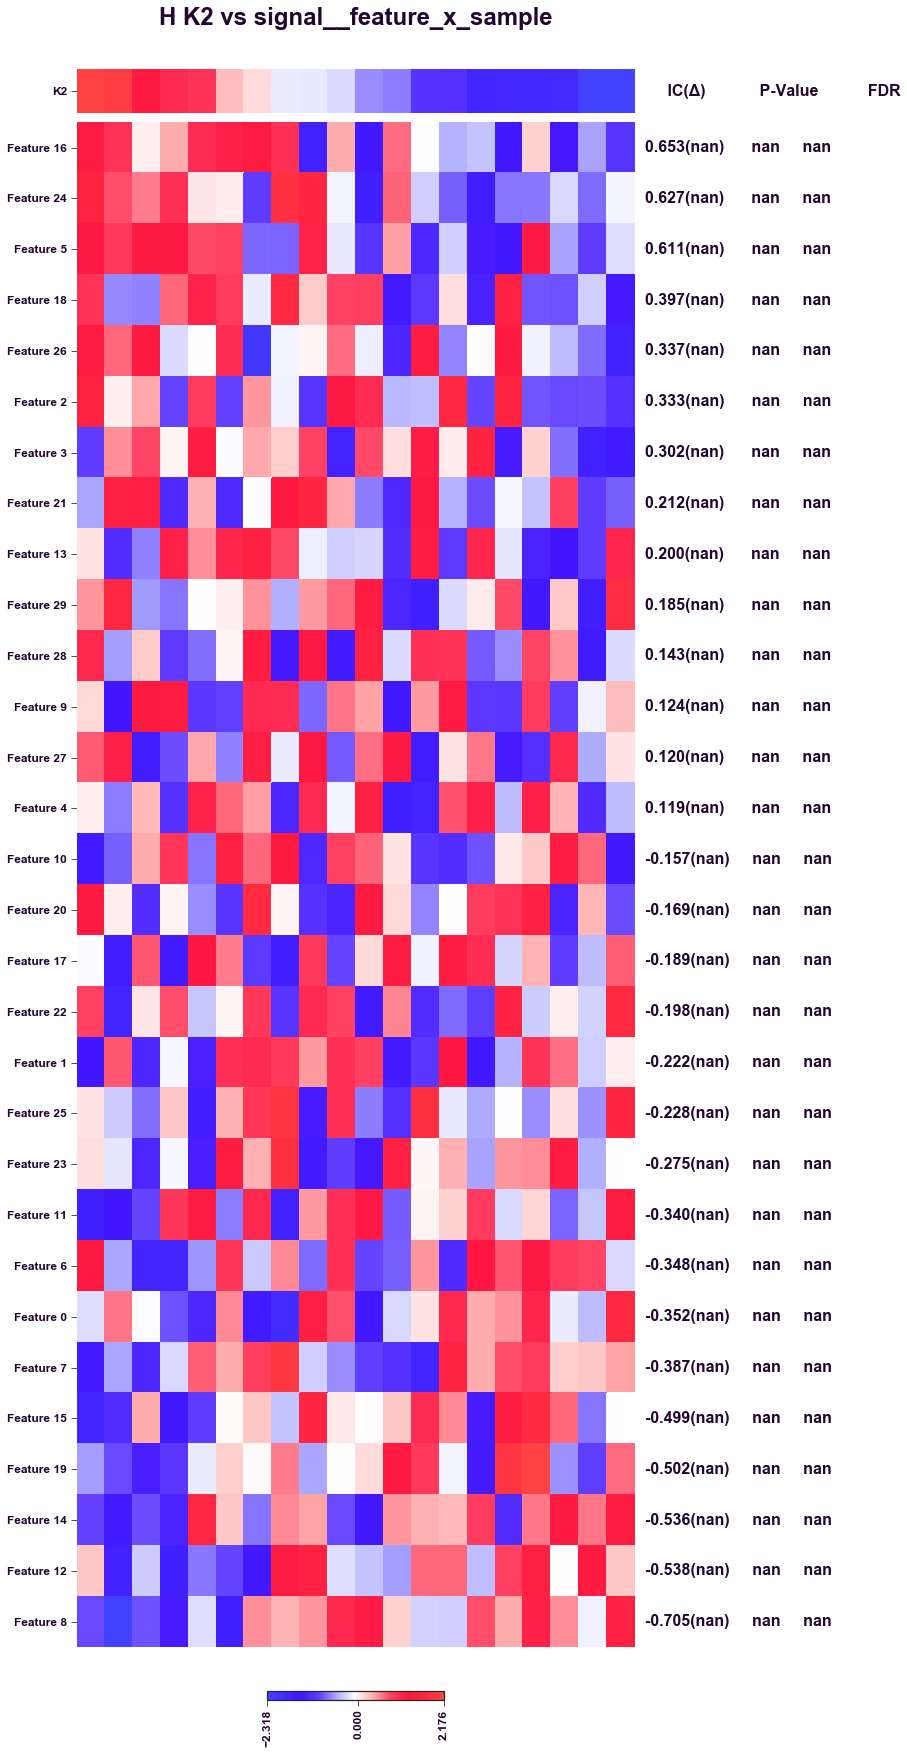

In [10]:
for component_name in w.columns:

    for matrix, w_or_h in (
        (
            w,
            'w', ),
        (
            h,
            'h', ), ):

        for features, features_name in (
            (
                a,
                'a', ),
            (
                signal__feature_x_sample,
                'signal__feature_x_sample', ), ):

            if w_or_h == 'w':
                component = matrix[component_name]
                features = features.T
            elif w_or_h == 'h':
                component = matrix.loc[component_name]

            title = '{} {} vs {}'.format(w_or_h.upper(), component_name,
                                         features_name)
            print(title)

            ccal.make_match_panel(
                component,
                features,
                n_job=max_n_job,
                n_top_feature=20,
                max_n_feature=None,
                n_sampling=0,
                n_permutation=0,
                title=title,
                file_path_prefix=os.path.join(output_directory_path, w_or_h,
                                              'match_signal',
                                              title.lower().replace(' ', '_')))
            mpl.pyplot.show()

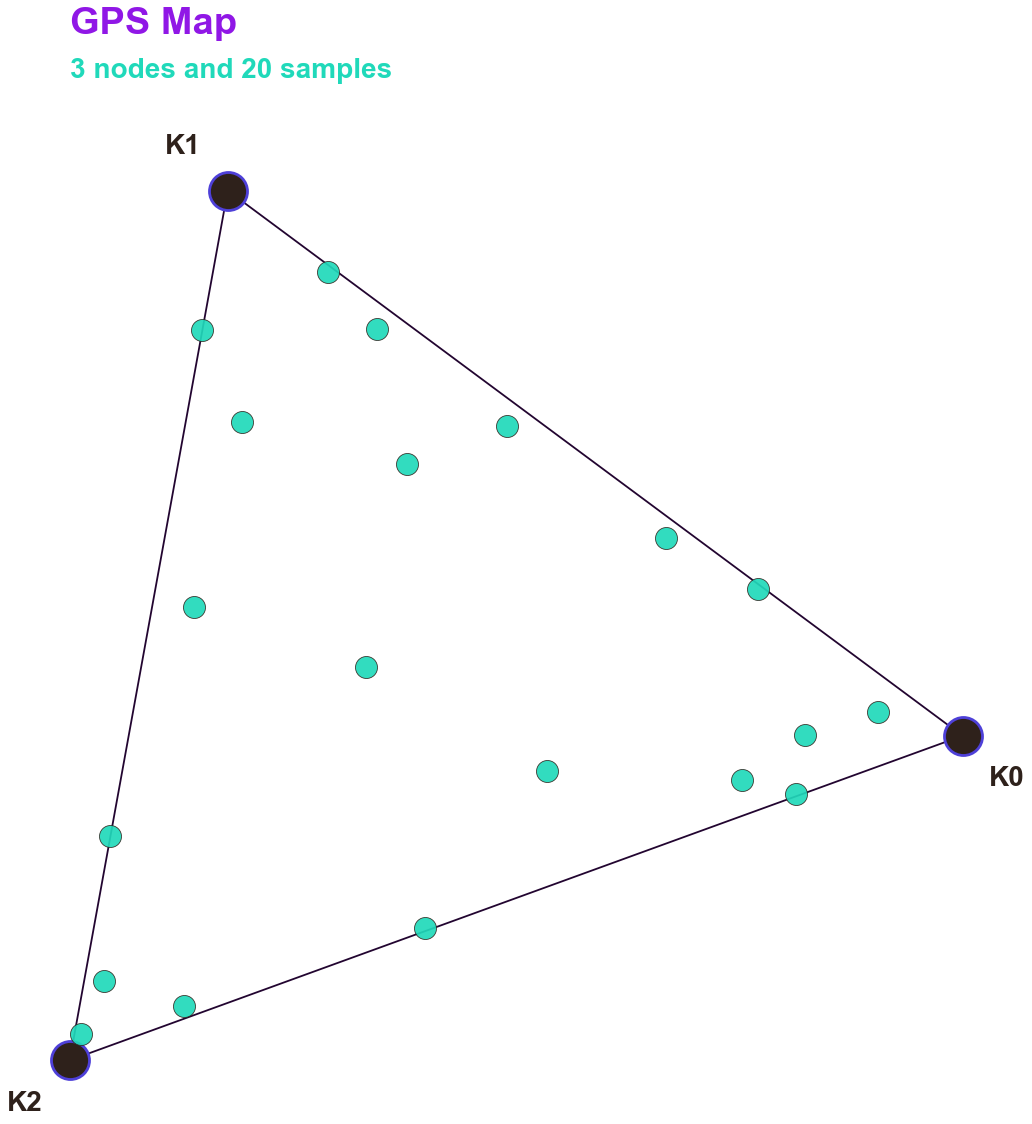

In [11]:
gps_map = ccal.GPSMap(
    h, pull_power=2.2, mds_distance_function=h_hcc_distance_function)

gps_map.sample_marker_style.update({
    'markersize': 22,
})

gps_map.plot_samples(file_path=os.path.join(output_directory_path, 'h',
                                            'map.png'))

Computing column-x-column distance with euclidean ...
HCC with K=2 ...
	(K=2) 10/10 - done.
HCC with K=3 ...
	(K=3) 10/10 - done.


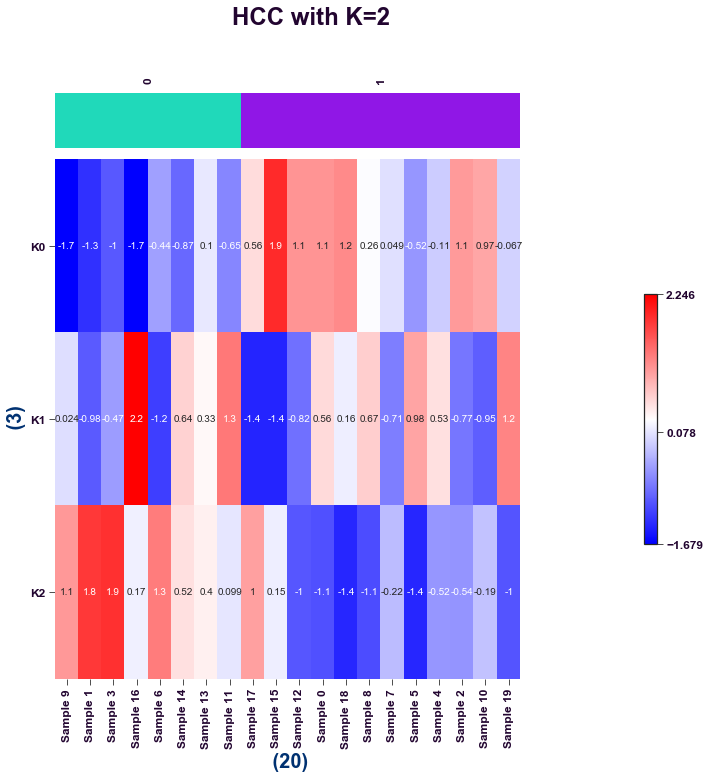

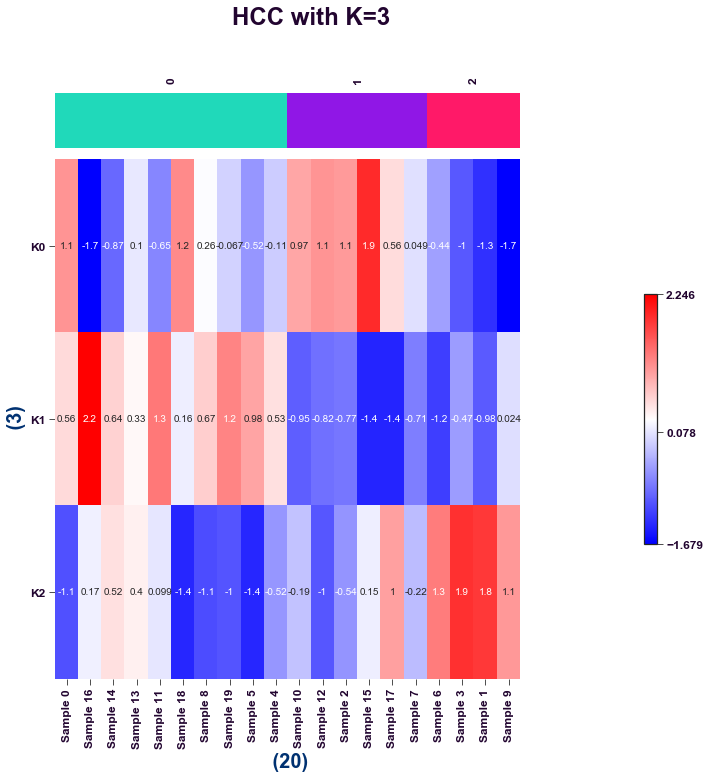

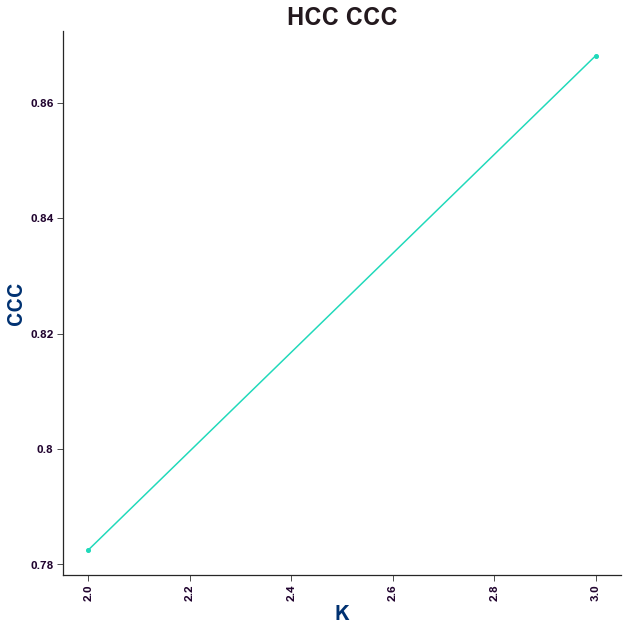

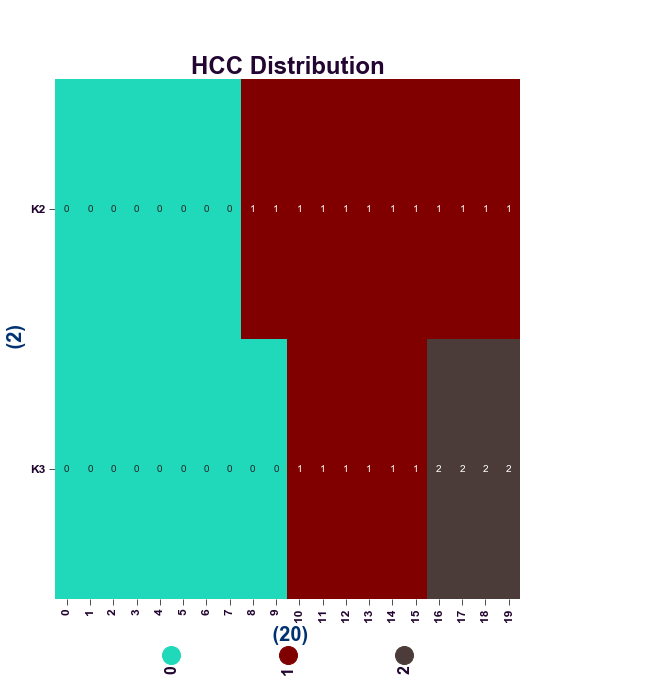

In [12]:
distance__column_x_column, k_hcc_distance_linkage, k_hcc_distance_linkage_ccc, hcc__k_x_column = ccal.explore_states(
    gps_map._node_x_sample,
    h_hcc_ks,
    n_job=min(max(h_hcc_ks) - min(h_hcc_ks) + 1, max_n_job),
    distance_function=h_hcc_distance_function,
    n_clustering=h_hcc_n_clustering,
    linkage_method=h_hcc_linkage_method,
    plot_df=True,
    directory_path=os.path.join(output_directory_path, 'h'))

/Users/k/Jumis/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


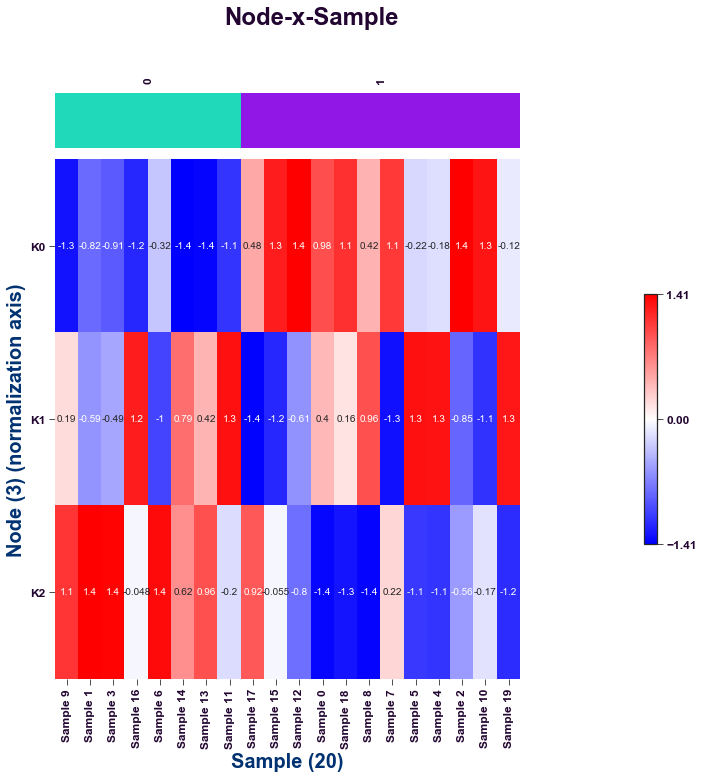

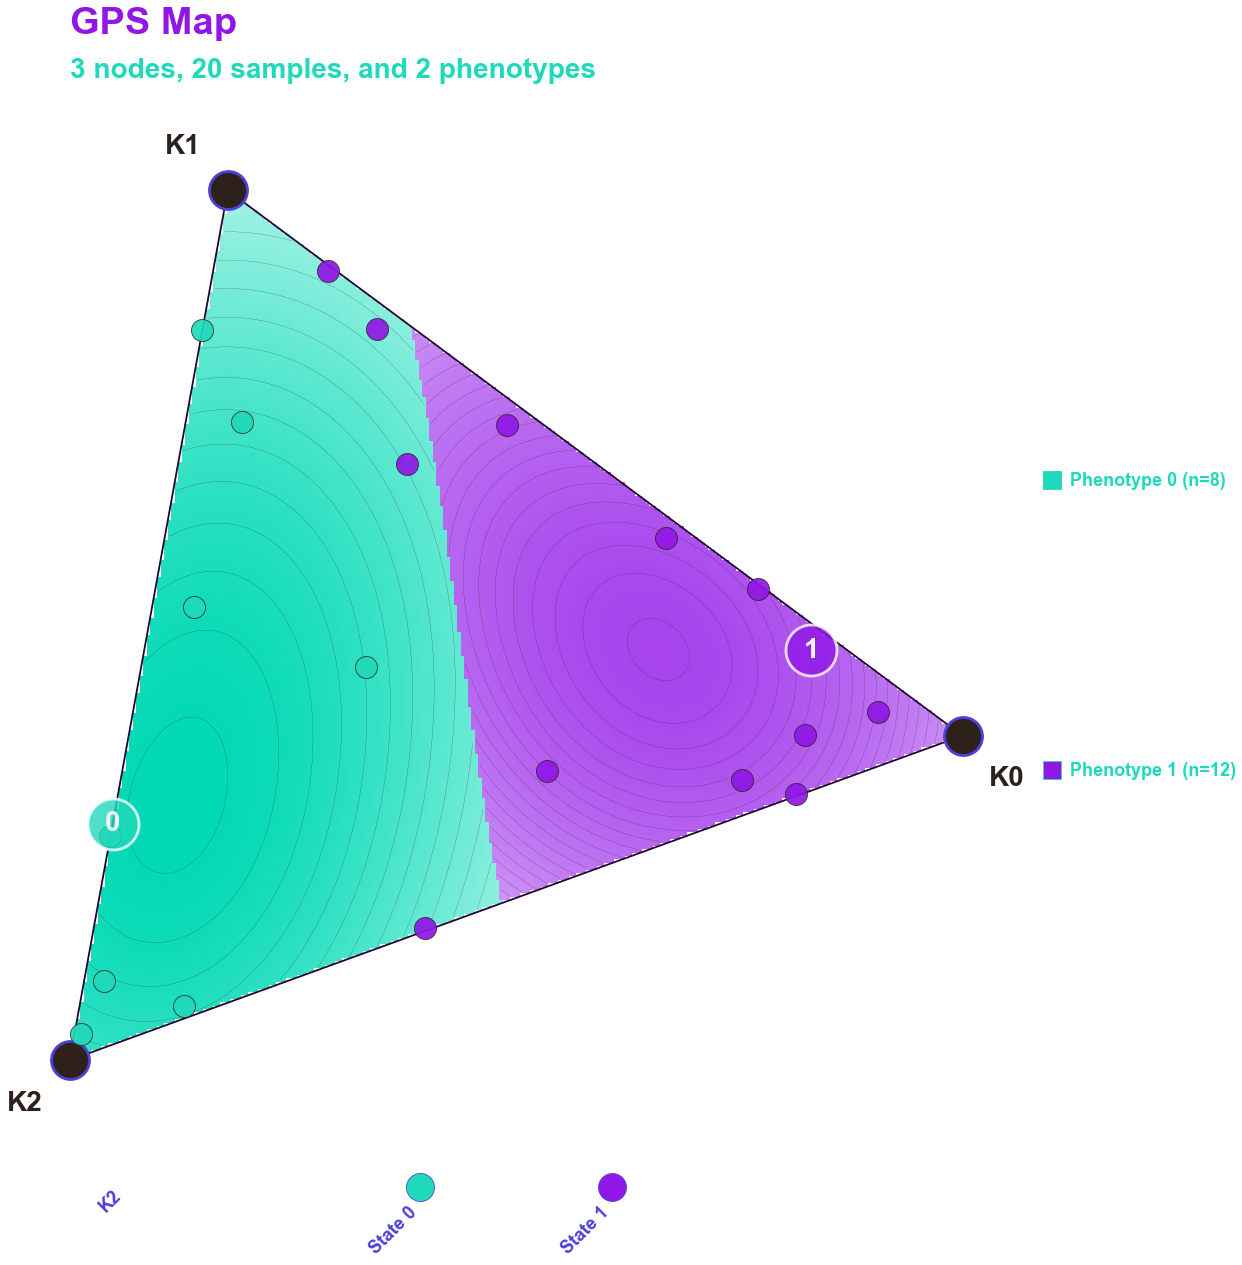

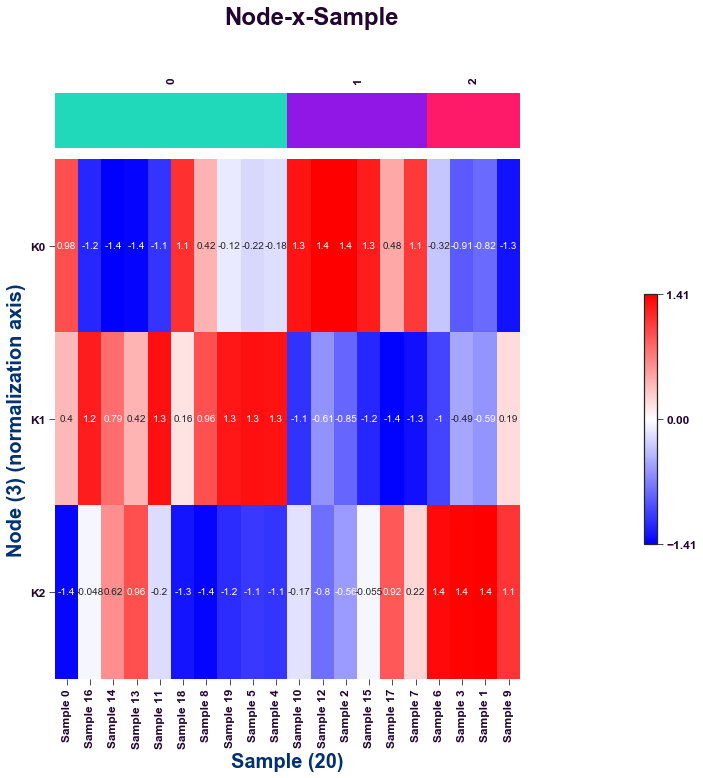

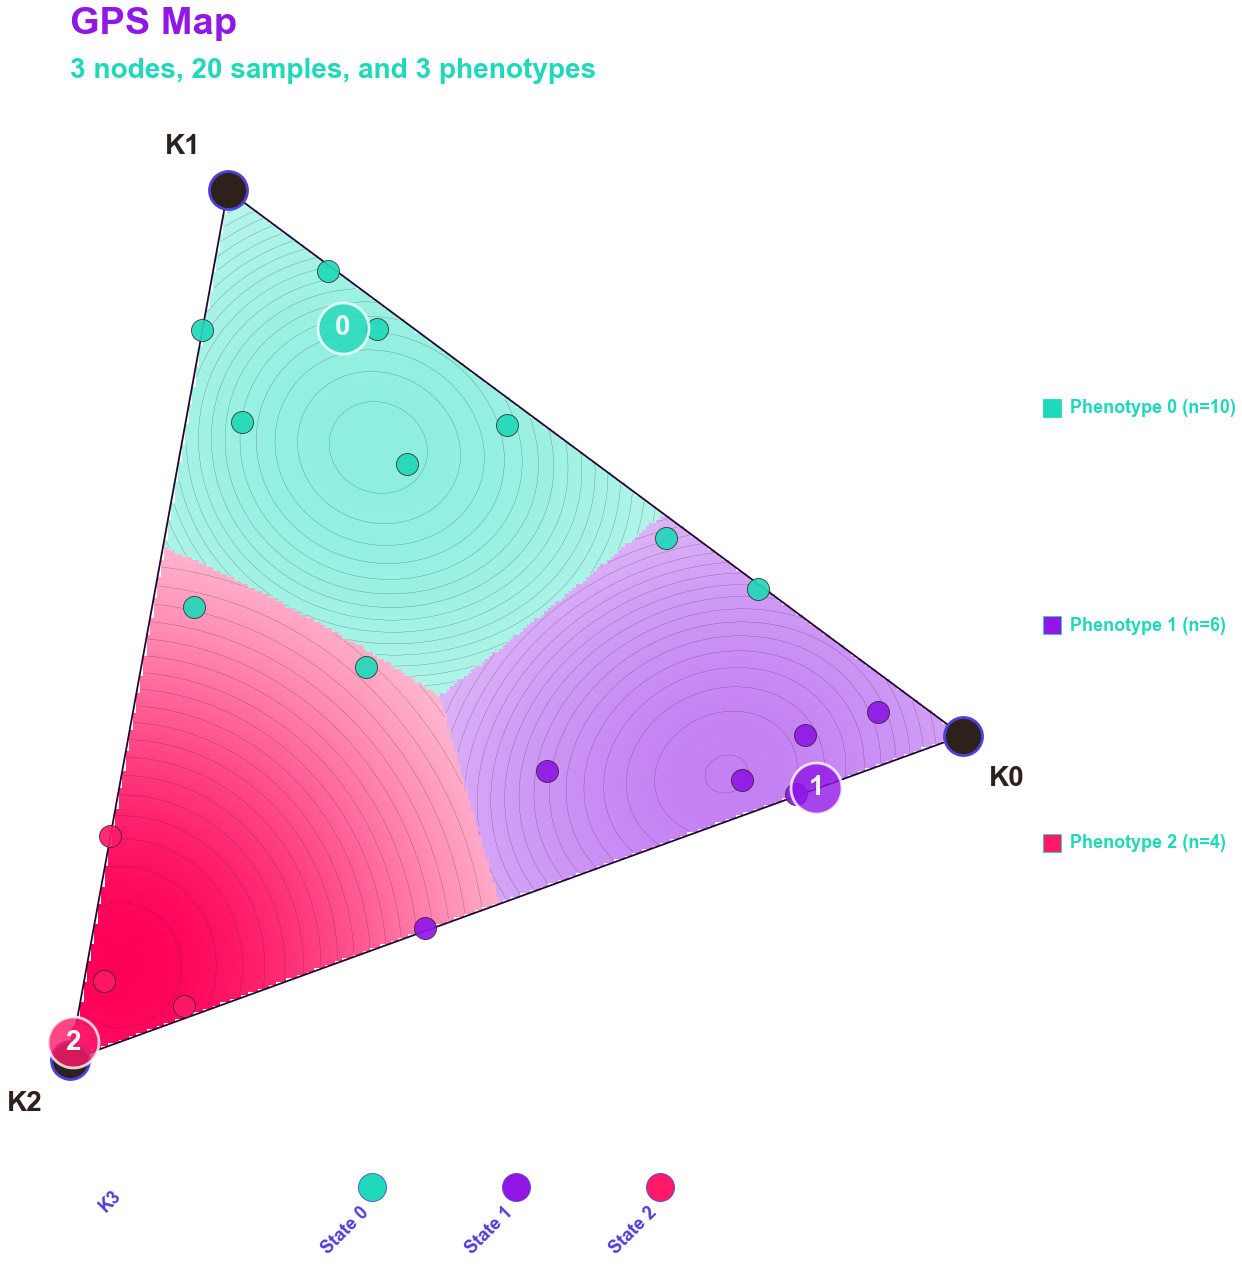

In [13]:
for hcc_k, sample_state in hcc__k_x_column.iterrows():

    if sample_state.value_counts().min() < 3:
        print('Skipping {}, who has 1<= state with less than 3 samples ...'.
              format(hcc_k))

    else:
        hcc_k = int(hcc_k.strip('K'))

        gps_map.set_sample_phenotypes(
            sample_state,
            bandwidth_factor=2.2,
            phenotype_to_str={i: 'State {}'.format(i)
                              for i in range(hcc_k)})

        gps_map.plot_samples_with_phenotype(
            plot_heatmap_=True,
            plot_centroid=True,
            file_path=os.path.join(output_directory_path, 'h',
                                   'map__hcc_k{}.png'.format(hcc_k)))
        mpl.pyplot.show()